# **Laporan Proyek Machine Learning - Fikri Zulfialdi**

## **Project Overview**


Bermain game tidak hanya memberikan hiburan, tetapi juga menawarkan berbagai manfaat psikologis dan kognitif. Penelitian menunjukkan bahwa game dapat meningkatkan kemampuan pemecahan masalah, kreativitas, serta koordinasi tangan-mata (Granic, Lobel, & Engels, 2014). Selain itu, beberapa game membantu pemain mengelola stres, seperti yang ditemukan dalam tinjauan sistematis tentang manfaat game terhadap kesehatan mental (Primack et al., 2012). Game juga mendukung pembentukan komunitas online yang memperkuat koneksi sosial (Kowert & Quandt, 2016) dan memberikan peluang pembelajaran melalui mekanisme permainan yang melatih keterampilan berpikir kritis (Gee, 2003). Bahkan, beberapa jenis game dapat meningkatkan aktivitas fisik dan kesehatan, seperti yang dijelaskan dalam studi tentang exergames (Staiano & Calvert, 2011). Dengan manfaat ini, menemukan game yang sesuai dengan minat dan kebutuhan pemain menjadi semakin penting untuk memaksimalkan pengalaman bermain.

Proyek pengembangan sistem rekomendasi game untuk platform Steam bertujuan memberikan pengalaman pengguna yang lebih personal dengan menyarankan game yang relevan berdasarkan preferensi dan aktivitas mereka. Sistem ini sangat dibutuhkan karena jumlah game yang tersedia sangat banyak, yang dapat membuat pengguna kewalahan dalam menemukan game yang sesuai dengan minat mereka (Valve Corporation, 2023). Selain membantu pengguna, sistem ini juga berdampak signifikan pada platform, seperti mengurangi tingkat ketidakaktifan pengguna (churn rate) dan meningkatkan pendapatan melalui penjualan yang lebih terarah (McKinsey & Company, 2021). Rekomendasi yang tepat mampu menciptakan pengalaman bermain yang lebih memuaskan, mempermudah pengguna menemukan konten baru, dan meningkatkan keterlibatan pengguna secara keseluruhan, sebagaimana dicatat dalam penelitian tentang perilaku pengguna di platform digital (Resnick & Varian, 1997).

Efektivitas sistem rekomendasi telah terbukti melalui berbagai penelitian. Menurut McKinsey & Company (2021), sekitar 35% penjualan Amazon berasal dari sistem rekomendasi, menunjukkan potensi besar model serupa untuk diterapkan pada Steam. Yann LeCun, seorang ahli kecerdasan buatan, menjelaskan bahwa teknologi seperti deep learning mampu membuat rekomendasi lebih personal dan kontekstual, sehingga meningkatkan relevansi rekomendasi bagi pengguna (LeCun, 2018). Dalam bukunya The Long Tail, Chris Anderson (2006) menyoroti bagaimana personalisasi membantu menjangkau pasar "ekor panjang," yang memungkinkan game indie atau kurang populer menemukan audiens yang sesuai. Penelitian Resnick dan Varian (1997) juga menunjukkan bahwa sistem rekomendasi berperan penting dalam meningkatkan keterlibatan dan loyalitas pengguna di platform digital. Valve, pengembang Steam, melaporkan bahwa fitur seperti Steam Discovery Queue mampu meningkatkan konversi penjualan game indie hingga 20-30%, memperkuat dampak positif sistem rekomendasi pada kesuksesan platform game digital (Valve Corporation, 2023).

Oleh karena itu sangat penting hadirnya sistem rekomendasi yang mumpuni yang bisa merekomendasikan dengan baik sesuai preferensi *user* yang diberi rekomendasi. Menjawab kepentingan tersebut, akan dibuat model sistem rekomendasi dengan menggunakan Content-Based Filtering dan Collaborative Filtering untuk menemukan sistem rekomendasi game terbaik menggunakan data dari platform penjualan game Steam.

## **Business Understanding**



### **Problem Statement**
1. Bagaimana cara meningkatkan pengalaman pengguna dalam memilih game di
platform Steam?
2. Game apa yang paling populer berdasarkan total durasi bermain, jumlah review, jumlah rekomendasi?
3. Apakah platform atau sistem operasi yang didukung (Windows, Mac, Linux) mempengaruhi preferensi pengguna?
4. Bagaimana distribusi harga game memengaruhi tingkat ulasan positif dari pengguna?
5. Apakah ada hubungan antara rating game dan jumlah waktu yang dihabiskan pengguna untuk memainkannya?


### **Goals**  
1. Mengembangkan model rekomendasi game yang mempermudah pengguna memilih game berdasarkan karakteristik game dan karakteristik user yang serupa.  
2. Menganalisis game dengan populasi yang diwakilkan oleh agregat total durasi bermain, jumlah review, dan jumlah rekomendasi.  
3. Mengeksplorasi pengaruh sistem operasi terhadap preferensi game pengguna.  
4. Menganalisis hubungan antara distribusi harga game dan tingkat ulasan positif.  
5. Mengidentifikasi hubungan antara rating game dan waktu yang dihabiskan pengguna untuk memainkannya.  



### **Solution**  
1. Menggunakan dua pendekatan rekomendasi utama:  
   - Content-Based Filtering: Menganalisis genre, tag, harga, dan fitur game lainnya untuk merekomendasikan game yang serupa dengan preferensi pengguna menggunakan *cosine similarity*.  
   - Collaborative Filtering: Menggunakan data ulasan dan interaksi pengguna untuk merekomendasikan game yang disukai oleh pengguna dengan preferensi serupa menggunakan algoritma deep learning *RecommenderNet*.  

2. Menggunakan Exploratory Data Analysis (EDA) untuk memahami tren dan pola pengguna:  
   - Menganalisis agregat data seperti total durasi bermain, jumlah ulasan, dan jumlah rekomendasi untuk mengidentifikasi game yang paling populer.  
   - Memahami hubungan antara distribusi harga game dengan tingkat ulasan positif.  
   - Mengeksplorasi preferensi genre berdasarkan jumlah ulasan, durasi bermain, dan feedback positif.  
   - Menganalisis dampak platform (Windows, Mac, Linux) terhadap preferensi pengguna untuk meningkatkan rekomendasi lintas platform.  
   - Menyelidiki hubungan antara rating game dengan waktu bermain untuk memberikan wawasan terhadap tingkat keterlibatan pengguna.  


## **Import Library**

In [2]:
import kagglehub
import textwrap
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Model
from keras.layers import Input, Embedding, Flatten, Dot, Dense
from keras.optimizers import Adam
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler, MultiLabelBinarizer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report, confusion_matrix
from scipy.sparse import csr_matrix, hstack
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker
!pip install tabulate
from tabulate import tabulate
import plotly.express as px
from google.colab import drive
import shutil


## **Data Understanding**



## **Data Loading**

Dataset ini berasal dari "https://www.kaggle.com/datasets/antonkozyriev/game-recommendations-on-steam" repositori Kaggle milik Anton Kozyriev, kemungkinan besar menggunakan data dari Steam API atau metode scraping untuk tujuan analisis rekomendasi game. Dengan 71K dilihat dan jumlah unduhan (10.9K entri) serta usability 10.00/10.00, dataset ini cukup populer dan dapat diandalkan.

In [ ]:
path = kagglehub.dataset_download("antonkozyriev/game-recommendations-on-steam")
print("Path to dataset files:" , path)

100%|██████████| 660M/660M [00:15<00:00, 43.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/antonkozyriev/game-recommendations-on-steam/versions/28


In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
source_paths = ['/root/.cache/kagglehub/datasets/antonkozyriev/game-recommendations-on-steam/versions/28/games.csv',
               '/root/.cache/kagglehub/datasets/antonkozyriev/game-recommendations-on-steam/versions/28/games_metadata.json',
               '/root/.cache/kagglehub/datasets/antonkozyriev/game-recommendations-on-steam/versions/28/recommendations.csv',
               '/root/.cache/kagglehub/datasets/antonkozyriev/game-recommendations-on-steam/versions/28/users.csv']
destination_path = '/content/drive/MyDrive/Recommendation/'
for path in source_paths:
    shutil.copy(path, destination_path)

Terdapat 4 file csv namun disini hanya digunakan 3 file yaitu `games.csv`, `games_metadata.json`, dan `recommendations.csv` ke dalam 2 DataFrame berbeda. Hal ini dilakukakan karena terdapat perbedaan struktur data.

In [4]:
# Load JSON from a file
games_metadata = pd.read_json('/content/drive/MyDrive/Recommendation/games_metadata.json', lines=True)

# Display the DataFrame
games_metadata.head()

,app_id,description,tags
0,13500,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre..."
1,22364,,[Action]
2,113020,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
3,226560,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P..."
4,249050,Dungeon of the Endless is a Rogue-Like Dungeon...,"[Roguelike, Strategy, Tower Defense, Pixel Gra..."


In [5]:
# Load CSV data (replace 'file_path' with the actual CSV file path)
games = pd.read_csv('/content/drive/MyDrive/Recommendation/games.csv')

# Display the first few rows of the CSV data
games.head()


,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True


File `games.csv` dan `games_metadata.json` digabung kedalam 1 dataframe yaitu `games_data`.

In [57]:
# Merge the two DataFrames on 'app_id'
games_data = pd.merge(games_metadata, games, on='app_id', how='inner')

# Display the merged DataFrame
games_data.head()


,app_id,description,tags,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre...",Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,,[Action],BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St...",Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P...",Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the Endless is a Rogue-Like Dungeon...,"[Roguelike, Strategy, Tower Defense, Pixel Gra...",Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True


Data `recommendations.csv` dibuat dataframe terpisah yaitu `recommendations` karena memiliki dimensi data yang berbeda.

In [7]:
# Load CSV data (replace 'file_path' with the actual CSV file path)
recommendations = pd.read_csv('/content/drive/MyDrive/Recommendation/recommendations.csv')

# Display the first few rows of the CSV data
recommendations.head()


,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,True,36.3,51580,0
1,304390,4,0,2017-02-17,False,11.5,2586,1
2,1085660,2,0,2019-11-17,True,336.5,253880,2
3,703080,0,0,2022-09-23,True,27.4,259432,3
4,526870,0,0,2021-01-10,True,7.9,23869,4


In [8]:
# Show total rows and total column of the data
total_row, total_column = games_data.shape
print(f"Total rows of games_data: {total_row}")
print(f"Total columns of games_data: {total_column}")
total_row, total_column = recommendations.shape
print(f"Total rows of recommendations: {total_row}")
print(f"Total columns of recommendations: {total_column}")

Total rows of games_data: 50872
Total columns of games_data: 15
Total rows of recommendations: 41154794
Total columns of recommendations: 8


`games_data` memiliki 50872 entri data dengan 15 kolom informasi sedangkan `recommendation` memiliki 41154794 entri data dengan 8 kolom informasi.

## **Variable Description**

penjelasan variabel pada dataframe `games_data`


| **No** | **Variabel**      | **Tipe Data** | **Penjelasan**                                                                 |
|--------|-------------------|---------------|---------------------------------------------------------------------------------|
| 1      | `app_id`          | `int64`       | ID unik untuk setiap aplikasi atau game di Steam.                              |
| 2      | `description`     | `object`      | Deskripsi singkat tentang game, biasanya mencakup fitur utama atau cerita.     |
| 3      | `tags`            | `object`      | Kumpulan tag atau kategori yang menggambarkan genre dan fitur game.            |
| 4      | `title`           | `object`      | Nama atau judul game di Steam.                                                 |
| 5      | `date_release`    | `object`      | Tanggal rilis game dalam format string.                                        |
| 6      | `win`             | `bool`        | Menunjukkan apakah game tersedia untuk platform Windows (`True`/`False`).      |
| 7      | `mac`             | `bool`        | Menunjukkan apakah game tersedia untuk platform MacOS (`True`/`False`).        |
| 8      | `linux`           | `bool`        | Menunjukkan apakah game tersedia untuk platform Linux (`True`/`False`).        |
| 9      | `rating`          | `object`      | Kategori rating game berdasarkan ulasan, seperti "Mostly Positive".            |
| 10     | `positive_ratio`  | `int64`       | Rasio ulasan positif dalam bentuk persentase (%).                              |
| 11     | `user_reviews`    | `int64`       | Jumlah total ulasan pengguna untuk game tersebut.                              |
| 12     | `price_final`     | `float64`     | Harga akhir game setelah diskon (dalam satuan mata uang tertentu).             |
| 13     | `price_original`  | `float64`     | Harga asli game sebelum diskon (dalam satuan mata uang tertentu).              |
| 14     | `discount`        | `float64`     | Persentase diskon yang diberikan pada game (dalam %).                          |
| 15     | `steam_deck`      | `bool`        | Menunjukkan apakah game kompatibel dengan Steam Deck (`True`/`False`).         |


penjelasan variabel pada dataframe `recommendations`

| **No** | **Variabel**      | **Tipe Data** | **Penjelasan**                                                               |
|--------|-------------------|---------------|-------------------------------------------------------------------------------|
| 1      | `app_id`          | `int64`       | ID unik untuk setiap aplikasi atau game di Steam yang terkait ulasan ini.    |
| 2      | `helpful`         | `int64`       | Jumlah reaksi "helpful" yang diberikan pengguna lain untuk ulasan ini.        |
| 3      | `funny`           | `int64`       | Jumlah reaksi "funny" yang diberikan pengguna lain untuk ulasan ini.          |
| 4      | `date`            | `object`      | Tanggal ulasan diberikan, biasanya dalam format string.                      |
| 5      | `is_recommended`  | `bool`        | Menunjukkan apakah ulasan merekomendasikan game (`True`/`False`).            |
| 6      | `hours`           | `float64`     | Jumlah jam yang dihabiskan pengguna bermain game sebelum menulis ulasan.     |
| 7      | `user_id`         | `int64`       | ID unik pengguna yang menulis ulasan.                                        |
| 8      | `review_id`       | `int64`       | ID unik untuk setiap ulasan dalam dataset.                                   |


## **Statistic Data**

In [ ]:
games_data.info()
games_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50872 non-null  int64  
 1   description     50872 non-null  object 
 2   tags            50872 non-null  object 
 3   title           50872 non-null  object 
 4   date_release    50872 non-null  object 
 5   win             50872 non-null  bool   
 6   mac             50872 non-null  bool   
 7   linux           50872 non-null  bool   
 8   rating          50872 non-null  object 
 9   positive_ratio  50872 non-null  int64  
 10  user_reviews    50872 non-null  int64  
 11  price_final     50872 non-null  float64
 12  price_original  50872 non-null  float64
 13  discount        50872 non-null  float64
 14  steam_deck      50872 non-null  bool   
dtypes: bool(4), float64(3), int64(3), object(5)
memory usage: 4.5+ MB


,app_id,positive_ratio,user_reviews,price_final,price_original,discount
count,5.087200e+04,50872.000000,5.087200e+04,50872.000000,50872.000000,50872.000000
mean,1.055224e+06,77.052033,1.824425e+03,8.620325,8.726788,5.592212
std,6.103249e+05,18.253592,4.007352e+04,11.514164,11.507021,18.606679
min,1.000000e+01,0.000000,1.000000e+01,0.000000,0.000000,0.000000
25%,5.287375e+05,67.000000,1.900000e+01,0.990000,0.990000,0.000000
50%,9.860850e+05,81.000000,4.900000e+01,4.990000,4.990000,0.000000
75%,1.524895e+06,91.000000,2.060000e+02,10.990000,11.990000,0.000000
max,2.599300e+06,100.000000,7.494460e+06,299.990000,299.990000,90.000000


Dataframe games_data memiliki 50872 entri rekod dan 15 kolom dengan 5 kolom numerik.

In [ ]:
recommendations.info()
recommendations.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41154794 entries, 0 to 41154793
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   app_id          int64  
 1   helpful         int64  
 2   funny           int64  
 3   date            object 
 4   is_recommended  bool   
 5   hours           float64
 6   user_id         int64  
 7   review_id       int64  
dtypes: bool(1), float64(1), int64(5), object(1)
memory usage: 2.2+ GB


,app_id,helpful,funny,hours,user_id,review_id
count,4.115479e+07,4.115479e+07,4.115479e+07,4.115479e+07,4.115479e+07,4.115479e+07
mean,6.032724e+05,3.202567e+00,1.058071e+00,1.006022e+02,7.450576e+06,2.057740e+07
std,4.729233e+05,4.693649e+01,2.867060e+01,1.761675e+02,4.010685e+06,1.188037e+07
min,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.539400e+05,0.000000e+00,0.000000e+00,7.800000e+00,4.287256e+06,1.028870e+07
50%,4.351500e+05,0.000000e+00,0.000000e+00,2.730000e+01,7.546446e+06,2.057740e+07
75%,9.331100e+05,0.000000e+00,0.000000e+00,9.920000e+01,1.096877e+07,3.086609e+07
max,2.253290e+06,3.621200e+04,2.810900e+04,1.000000e+03,1.430606e+07,4.115479e+07


Dataframe recommendations memiliki 41154794  entri data dan 8 kolom dengan 3 kolom numerik.

## **Exploratory Data Analysis**

### **Univariate Data Analysis**

#### **Price**

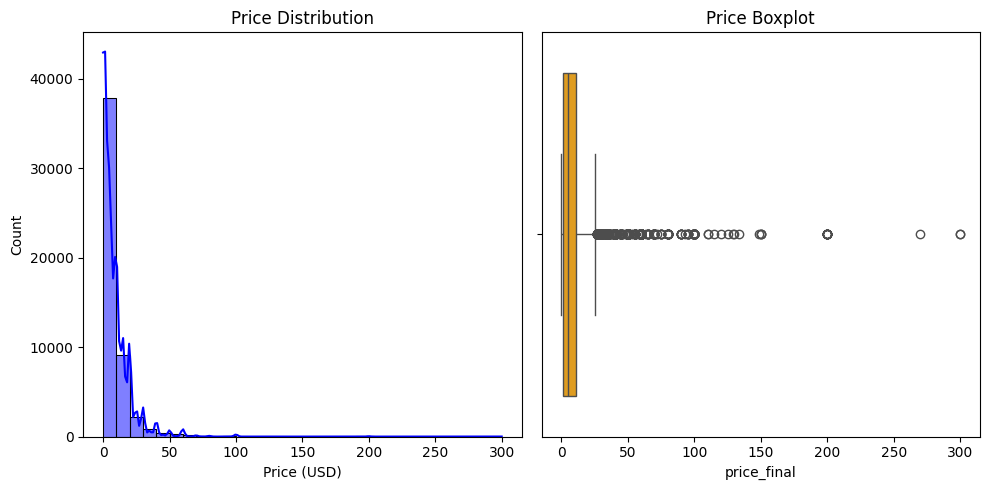

Mean Price: 8.620324933165593
Median Price: 4.99
Mode Price: 0.0


In [9]:
# Plot histogram and boxplot for price_final
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(games_data['price_final'], kde=True, bins=30, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price (USD)')

plt.subplot(1, 2, 2)
sns.boxplot(x=games_data['price_final'], color='orange')
plt.title('Price Boxplot')

plt.tight_layout()
plt.show()

# Central tendencies
print(f"Mean Price: {games_data['price_final'].mean()}")
print(f"Median Price: {games_data['price_final'].median()}")
print(f"Mode Price: {games_data['price_final'].mode()[0]}")


Distribusi harga dari sebuah game ternyata sangat terjal ke kanan. Artinya sebagian besar data berada di bawah quartil bawah.

#### **Rating**

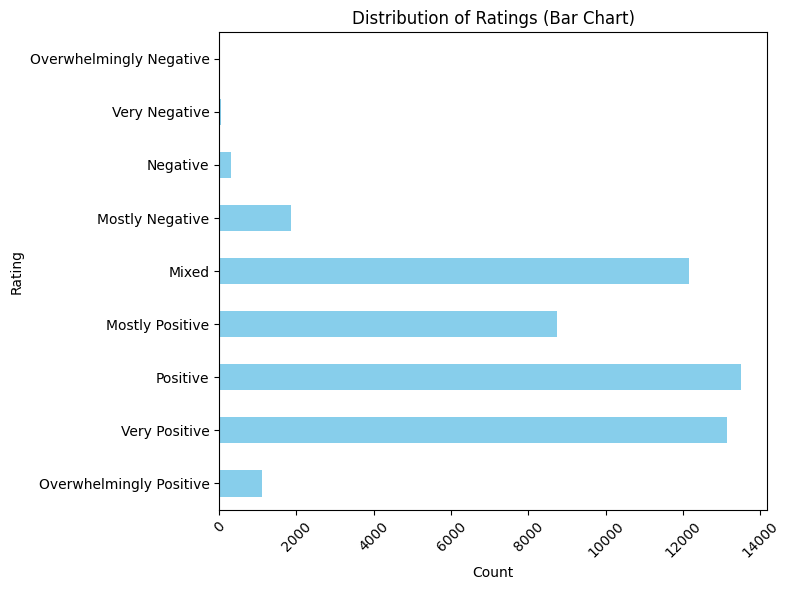

In [10]:
# Simulating the data
rating_order = ["Overwhelmingly Positive", "Very Positive", "Positive", "Mostly Positive", "Mixed",
                "Mostly Negative", "Negative", "Very Negative", "Overwhelmingly Negative"]



# Convert 'rating' to a Categorical type with the custom order
rating_data = pd.Categorical(games_data['rating'], categories=rating_order, ordered=True)

# Count the occurrences of each rating
rating_counts = rating_data.value_counts()

# Reorder the counts according to the custom order
rating_counts = rating_counts[rating_order]

# Plot horizontal bar chart using Matplotlib
plt.figure(figsize=(8, 6))
rating_counts.plot(kind='barh', color='skyblue')
plt.title('Distribution of Ratings (Bar Chart)')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the bar chart
plt.show()

# Create the pie chart using Plotly
df_pie = pd.DataFrame({
    'rating': rating_counts.index,
    'count': rating_counts.values
})

# Plot the pie chart using Plotly
fig_pie = px.pie(df_pie, values='count', names='rating', title='Distribution of Ratings (Pie Chart)')

# Update pie chart to display both count and percentage beside each other, and remove the legend
fig_pie.update_traces(
    textposition='outside',
    textinfo='percent+label',  # Show percentage and label
    marker=dict(line=dict(color='black', width=1)),
    showlegend=False  # Remove the legend
)

# Show the pie chart
fig_pie.show()



Sebagian besar `rating` berada ada kategori positive dengan berbagai derajatnya kecuali `overwhelmingly positive`.

#### **Positive Ratio**

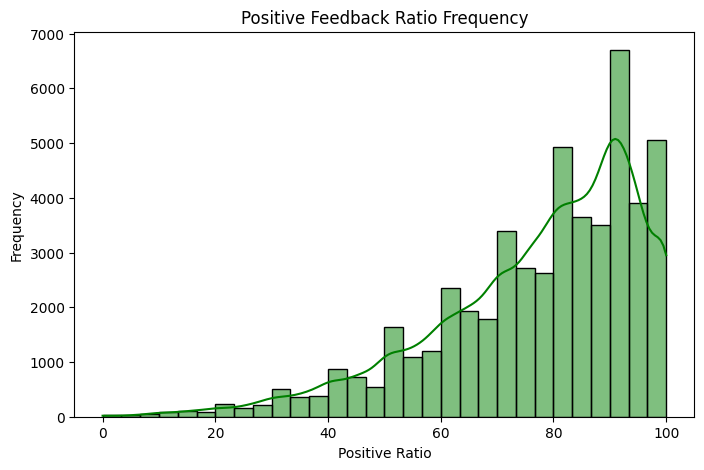

Top-rated games (positive_ratio > 90%):
                                           title  positive_ratio
2                   Monaco: What's Yours Is Mine              92
8              Hyperdimension Neptunia Re;Birth1              94
16                                          FORM              91
21      Sniper Elite 3 - Camouflage Weapons Pack              95
27                   Take Command - 2nd Manassas              93
...                                          ...             ...
50856                                   STANDBOX              91
50858                              Fortune's Run              94
50860                             Kill The Crows              96
50867  I Expect You To Die 3: Cog in the Machine              96
50870                        Forgive Me Father 2              95

[13405 rows x 2 columns]


In [27]:
# Plot histogram and density plot for positive_ratio
plt.figure(figsize=(8, 5))
sns.histplot(games_data['positive_ratio'], kde=True, color='green', bins=30)
plt.title('Positive Feedback Ratio Frequency')
plt.xlabel('Positive Ratio')
plt.ylabel('Frequency')
plt.show()

# Identify games with positive_ratio > 90%
top_rated_games = games_data[games_data['positive_ratio'] > 90]
print(f"Top-rated games (positive_ratio > 90%):\n{top_rated_games[['title', 'positive_ratio']]}")


Distribusi `Rasio Ulasan Positif` adalah normal dengan miring ke kiri. Sebagian besar data berada di atas rata-rata. Dengan Nilai di kisaran 90 memiliki frekuensi terbanyak.

#### **User Reviews**

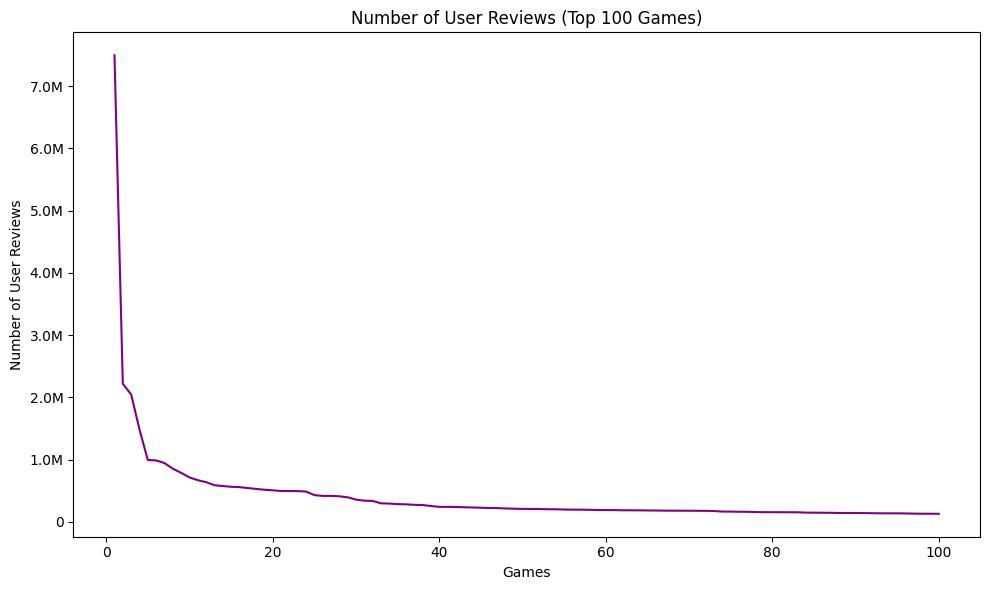

Top-rated games (positive_ratio > 90%):
                                  title  user_reviews
14398  Counter-Strike: Global Offensive       7494460
47770               PUBG: BATTLEGROUNDS       2217226
13176                            Dota 2       2045628
12717                Grand Theft Auto V       1484122
14535   Tom Clancy's Rainbow Six® Siege        993312
...                                 ...           ...
47793                          Factorio        134384
11720              World of Tanks Blitz        131334
480                          Far Cry® 5        129943
15926                 World of Warships        129335
48601                Sons Of The Forest        128626

[100 rows x 2 columns]


In [12]:
# Sort the 'user_reviews' column and select the top 100 games
top_100_reviews = games_data.sort_values(by='user_reviews', ascending=False).head(100)

# Create a ranking column (1-based index) for the top 100 games
top_100_reviews['ranking'] = range(1, len(top_100_reviews) + 1)

def format_ticks(x, pos):
    if x >= 1_000_000:
        return f'{x*1e-6:.1f}M'  # Format as millions
    elif x >= 1_000:
        return f'{x*1e-3:.1f}K'  # Format as thousands
    else:
        return f'{x:.0f}'  # Show the number as is



# Plot the ranking vs user reviews as a continuous line plot
plt.figure(figsize=(10, 6))
plt.plot(top_100_reviews['ranking'], top_100_reviews['user_reviews'], color='purple', linestyle='-', markersize=5)
plt.title('Number of User Reviews (Top 100 Games)')
plt.xlabel('Games')
plt.ylabel('Number of User Reviews')


# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks))

plt.tight_layout()  # Adjust layout to fit everything
plt.show()
print(f"Top-rated games (positive_ratio > 90%):\n{top_100_reviews[['title', 'user_reviews']]}")


Jumlah review seluruh game diurutkan dari yang terbesar dan ternyata distribusi jumlah review setiap game sangat timpang dengan hanya beberapa game saja yang memiliki jumlah review yang sangat besar.

#### **Date Release**

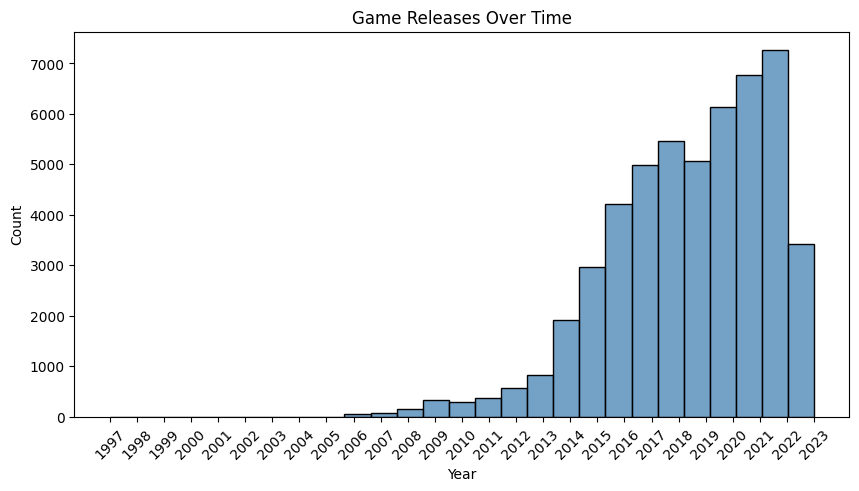

date_release
1997       2
1998       1
1999       3
2000       2
2001       2
2002       1
2003       2
2004       4
2005       3
2006      56
2007      82
2008     146
2009     322
2010     284
2011     376
2012     565
2013     822
2014    1921
2015    2963
2016    4209
2017    4989
2018    5461
2019    5057
2020    6135
2021    6774
2022    7265
2023    3425
Name: count, dtype: int64


In [13]:
# Extract release year
release_year = pd.to_datetime(games_data['date_release']).dt.year

# Get the range of years
years_range = range(release_year.min(), release_year.max() + 1)

# Plot histogram for game releases by year
plt.figure(figsize=(10, 5))
sns.histplot(release_year, bins=len(years_range), kde=False, color='steelblue')

# Adjust the x-axis to show every year
plt.xticks(years_range, rotation=45)

# Add titles and labels
plt.title('Game Releases Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# Analyze production trend
release_trend = release_year.value_counts().sort_index()
print(release_trend)


Setiap tahun jumlah game yang dirilis cenderung selalu meningkat kecuali di tahun 2018 dan 2023.

#### **Top Games**

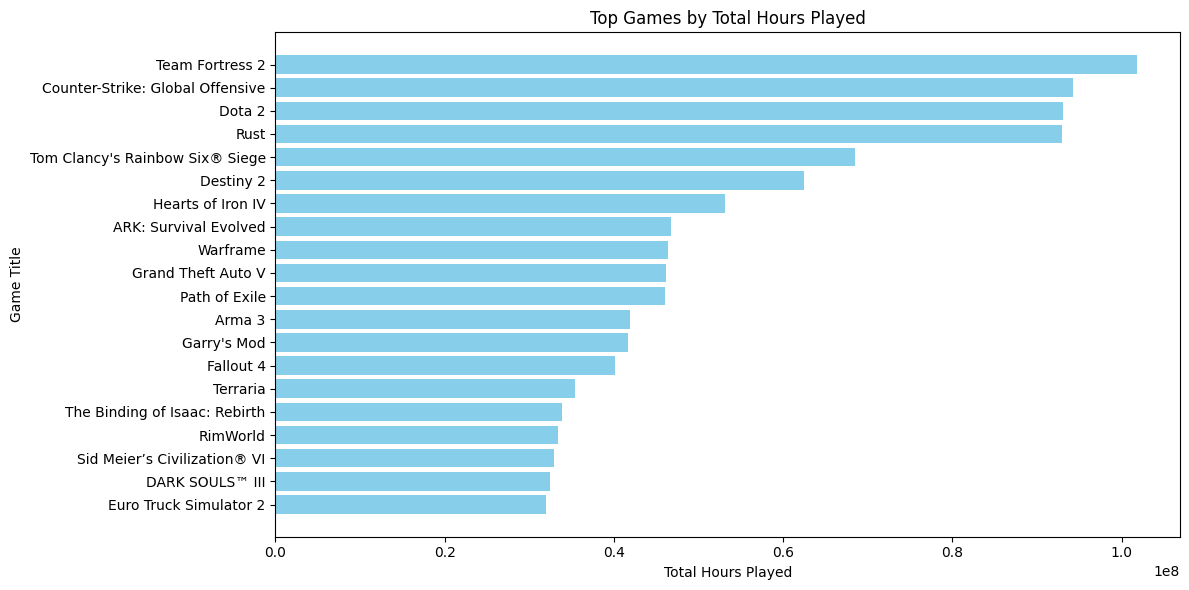

In [14]:
game_hours = recommendations.groupby('app_id')['hours'].sum().reset_index()

# Merge with game metadata to get titles
game_hours = pd.merge(game_hours, games_data[['app_id', 'title']], on='app_id', how='left')

# Sort by hours played in descending order
game_hours = game_hours.sort_values(by='hours', ascending=False)

# Select the top N games (e.g., top 20)
top_games = game_hours.head(20)  # Adjust N as needed

plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.barh(top_games['title'], top_games['hours'], color='skyblue')
plt.xlabel('Total Hours Played')
plt.ylabel('Game Title')
plt.title('Top Games by Total Hours Played')
plt.gca().invert_yaxis()  # Invert y-axis to show the most played game at the top
plt.tight_layout()
plt.show()

Game yang memiliki Total Waktu Dimainkan tertinggi adalah **Team Fortress 2**.

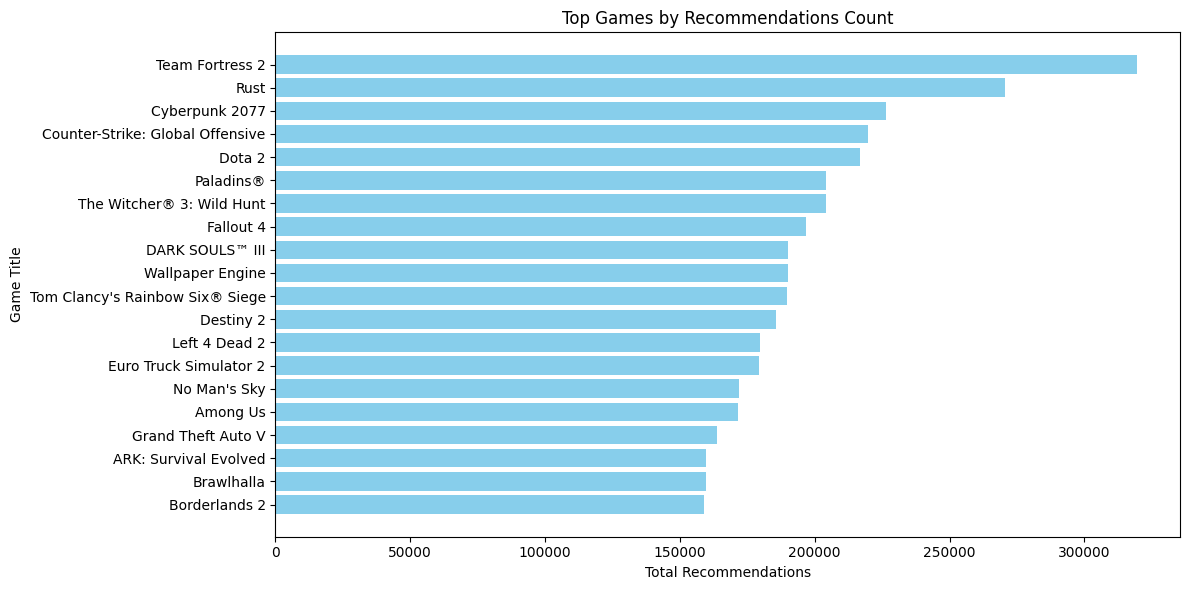

In [15]:
# Assuming your DataFrame is named 'recommendations'
game_recommendations_count = recommendations.groupby('app_id')['is_recommended'].count().reset_index()
game_recommendations_count.columns = ['app_id', 'recommendation_count']

# Sort by recommendation count in descending order
game_recommendations_count = game_recommendations_count.sort_values(by='recommendation_count', ascending=False)

# Select the top N games (e.g., top 10)
top_recommended_games = game_recommendations_count.head(20)  # Adjust N as needed

# Merge with games_data to get titles
top_recommended_games = pd.merge(top_recommended_games, games_data[['app_id', 'title']], on='app_id', how='left')

plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.barh(top_recommended_games['title'], top_recommended_games['recommendation_count'], color='skyblue')
plt.xlabel('Total Recommendations')
plt.ylabel('Game Title')
plt.title('Top Games by Recommendations Count')
plt.gca().invert_yaxis()  # Invert y-axis to show the most played game at the top
plt.tight_layout()
plt.show()

Game yang paling banyak direkomendasikan adalah **Team Fortress 2**.

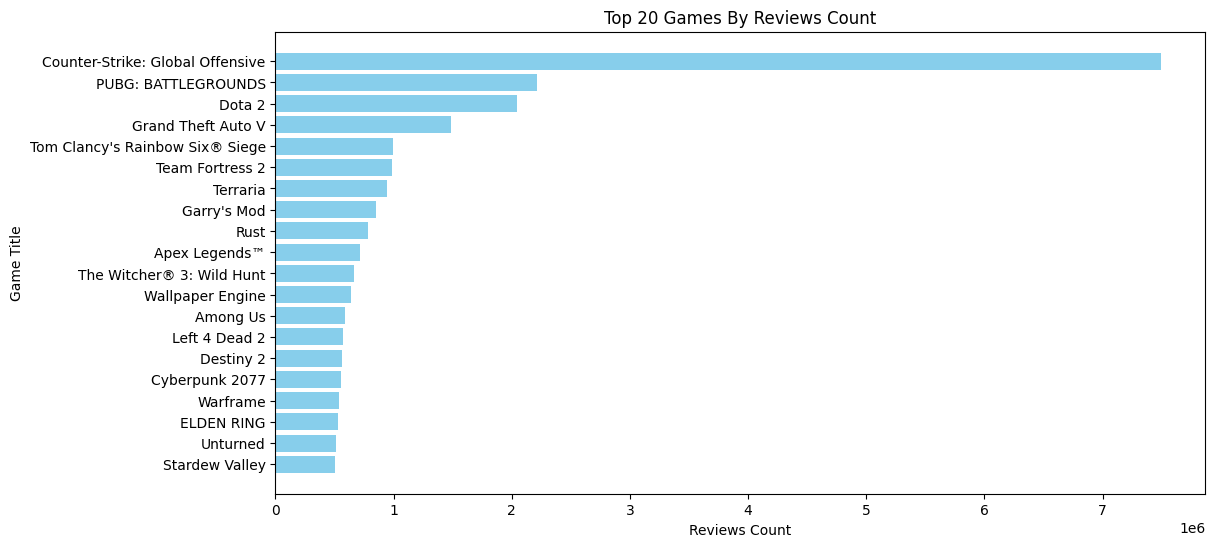

In [16]:
# Hitung jumlah ulasan untuk setiap game
game_review_counts = games_data.groupby('title')['user_reviews'].sum().reset_index()

# Urutkan game berdasarkan jumlah ulasan, dari yang terbanyak hingga terkecil
top_games = game_review_counts.sort_values(by='user_reviews', ascending=False).head(20)  # Pilih top 20 game

# Buat plot batang horizontal
plt.figure(figsize=(12, 6))  # Atur ukuran gambar
plt.barh(top_games['title'], top_games['user_reviews'], color='skyblue')
plt.xlabel('Reviews Count')
plt.ylabel('Game Title')
plt.title('Top 20 Games By Reviews Count')
plt.gca().invert_yaxis()  # Balikkan sumbu y agar game dengan ulasan terbanyak

Game yang paling banyak di-review adalah **Counter-Strike: Global Offensive**.

### **Multivariate Data Analysis**

#### **Average Price vs Positive Feedback Ratio**

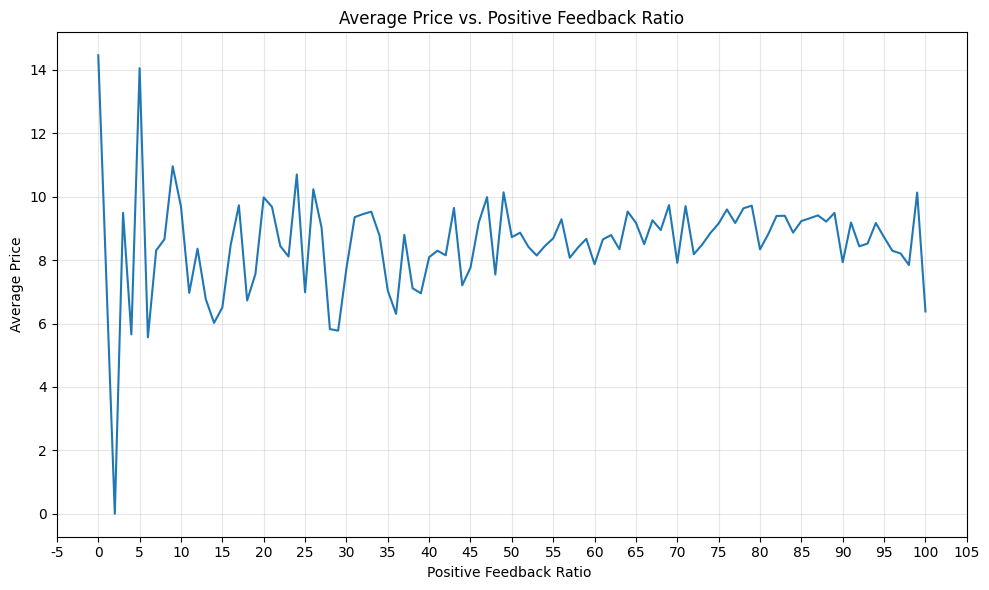

In [17]:
# 1. Filter for Integer Positive Feedback Ratios:
integer_feedback_data = games_data[games_data['positive_ratio'].astype(int) == games_data['positive_ratio']]

# 2. Calculate Average Price per Integer Feedback Ratio:
avg_price_per_int_feedback = integer_feedback_data.groupby('positive_ratio')['price_final'].mean()

# 3. Create Line Plot with Tidy Ticks:
fig, ax = plt.subplots(figsize=(10, 6))  # Create figure and axes object

ax.plot(avg_price_per_int_feedback.index, avg_price_per_int_feedback.values, linestyle='-')
ax.set_title('Average Price vs. Positive Feedback Ratio')
ax.set_xlabel('Positive Feedback Ratio ')
ax.set_ylabel('Average Price')

# Set x-axis ticks with custom formatting
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))  # Set ticks every 5 units
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))  # Format as integers


plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

 Rasio *feedback* positif yang rendah (10-50), terlihat fluktuasi harga yang cukup besar dengan kecenderungan sedikit meningkat. Namun, seiring dengan meningkatnya rasio, fluktuasi mulai berkurang, dan grafik menjadi lebih stabil. Yaitu pada rentang rasio *feedback* positif 50-100, harga rata-rata cenderung stabil dengan variasi yang minim. Ini menunjukkan bahwa rasio *feedback* positif tidak memiliki kaitan signifikan dengan harga, hanya ada sedikit korelasi positif pada kisaran yang rendah.

#### **Median Positive Feedback Ratio by Price Intervals**

<ipython-input-18-cd92eef67f09>:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



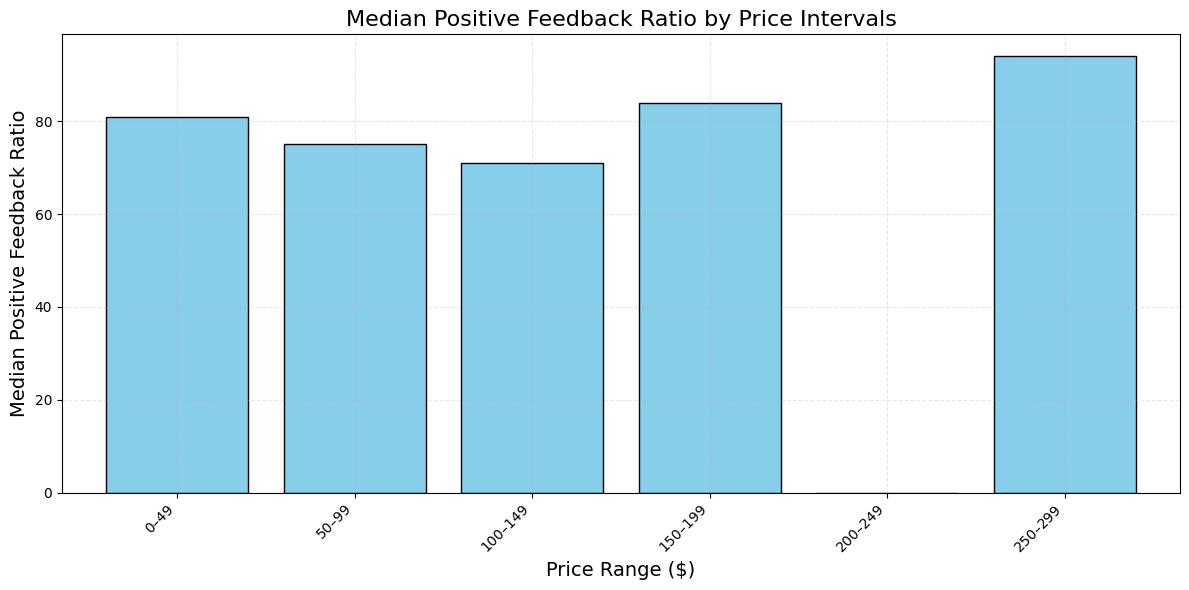

In [18]:
# Define price bins with $50 intervals
bin_edges = range(0, int(games_data['price_final'].max()) + 50, 50)  # Adjust range as needed
price_bins = pd.cut(games_data['price_final'], bins=bin_edges, right=False)  # Create intervals

# Create readable labels for the bins
price_labels = [f"${int(interval.left)}–${int(interval.right-1)}" for interval in price_bins.cat.categories]
price_bins = price_bins.cat.rename_categories(price_labels)

# Calculate the median positive feedback for each price range
median_feedback = games_data.groupby(price_bins)['positive_ratio'].median()

# Plot the median positive feedback for each $50 price range
plt.figure(figsize=(12, 6))
median_feedback.plot(kind='bar', color='skyblue', edgecolor='black', width=0.8)
plt.title('Median Positive Feedback Ratio by Price Intervals', fontsize=16)
plt.xlabel('Price Range ($)', fontsize=14)
plt.ylabel('Median Positive Feedback Ratio', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


Sejauh ini tidak signifikan pengaruh `harga game` terhadap `Rasio Ulasan Positif`. Hanya ada sedikit penurunan `rasio ulasan positif` pada rentang harga yang rendah dan sedikit peningkatan pada rentang harga menengah ke tinggi.

#### **Average Positive Ratio by Tag**

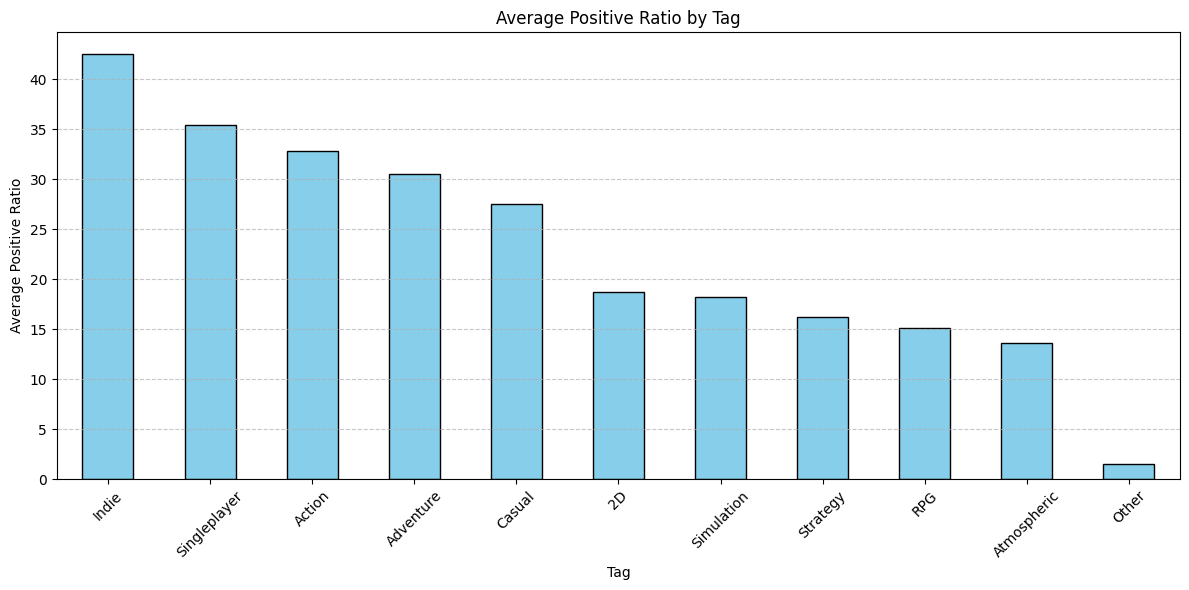

Top 10 Tags by Average Positive Ratio:
Indie           42.558795
Singleplayer    35.419602
Action          32.794347
Adventure       30.567424
Casual          27.528994
2D              18.713850
Simulation      18.241567
Strategy        16.236043
RPG             15.084840
Atmospheric     13.605638
dtype: float64

Other tags aggregated average positive ratio: 1.51


In [19]:
# One-hot encode tags
tags_one_hot = games_data['tags'].apply(lambda tags: pd.Series(1, index=tags)).fillna(0)

# Calculate the average positive_ratio for each tag without concatenating
tag_scores = tags_one_hot.mul(games_data['positive_ratio'], axis=0).mean().sort_values(ascending=False)

# Separate top 10 tags and aggregate the rest into "Other"
top_10_tags = tag_scores.head(10)
other_score = tag_scores.iloc[10:].mean()

# Create a new Series for plotting
aggregated_scores = pd.concat([top_10_tags, pd.Series({'Other': other_score})])

# Bar chart for comparison
plt.figure(figsize=(12, 6))
aggregated_scores.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Positive Ratio by Tag')
plt.xlabel('Tag')
plt.ylabel('Average Positive Ratio')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print the top 10 tags and the aggregated score
print("Top 10 Tags by Average Positive Ratio:")
print(top_10_tags)
print(f"\nOther tags aggregated average positive ratio: {other_score:.2f}")


Tags yang memiliki Rasio Ulasan Positif paling tinggi adalah Indie. Game indie banyak memiliki ulasan positif karena banyak dimaklumi oleh pemain juga harganya yang biasanya sangat murah.

#### **Average Price by Tag**

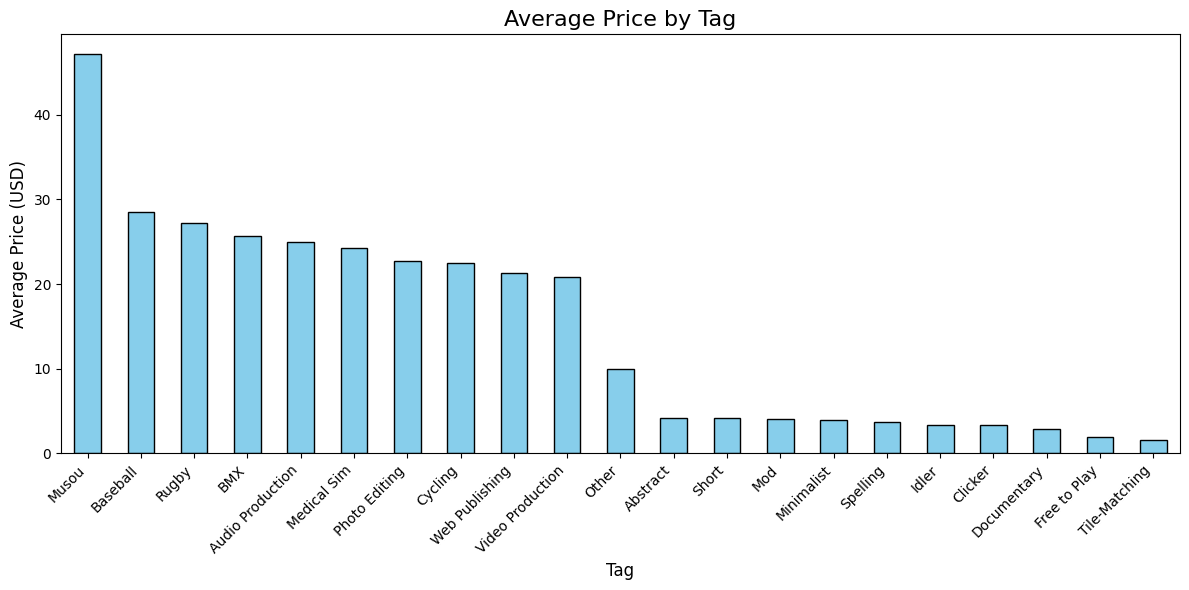

Top 10 and Bottom 10 Genres:
Musou               47.115417
Baseball            28.531081
Rugby               27.240625
BMX                 25.712222
Audio Production    24.915827
Medical Sim         24.242135
Photo Editing       22.773750
Cycling             22.528500
Web Publishing      21.339808
Video Production    20.850899
Other                9.947339
Abstract             4.193056
Short                4.132869
Mod                  4.104306
Minimalist           3.948958
Spelling             3.698846
Idler                3.383874
Clicker              3.328889
Documentary          2.906122
Free to Play         1.898432
Tile-Matching        1.592000
dtype: float64


In [20]:
# Assuming 'tags_one_hot' is a DataFrame with one-hot encoded tags and 'games_data' contains the relevant columns.
tags_one_hot = games_data['tags'].apply(lambda tags: pd.Series(1, index=tags)).fillna(0)
# Select only the 'tags_one_hot' and the 'price_final' column from games_data
tags_columns = tags_one_hot.columns  # One-hot encoded tag columns
price_column = 'price_final'

# Create a new dictionary to store average prices by tag
avg_price_by_tag = {}

# For each tag column, calculate the mean price where the tag is present (i.e., column value is 1).
for tag in tags_columns:
    avg_price_by_tag[tag] = games_data[tags_one_hot[tag] == 1][price_column].mean()

# Convert the dictionary to a pandas Series for easier plotting
avg_price_by_tag = pd.Series(avg_price_by_tag).sort_values(ascending=False)

# Select the top 10 and bottom 10 tags
top_10_tags = avg_price_by_tag.head(10)
bottom_10_tags = avg_price_by_tag.tail(10)

# Average the rest as 'Other' (the tags between the top 10 and bottom 10)
other_tags = avg_price_by_tag.iloc[10:-10].mean()
final_avg_price_by_tag = pd.concat([ top_10_tags , pd.Series({'Other': other_tags}), bottom_10_tags ])

# Plot the average price by tag as a bar chart.
plt.figure(figsize=(12, 6))
final_avg_price_by_tag.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Average Price by Tag', fontsize=16)
plt.xlabel('Tag', fontsize=12)
plt.ylabel('Average Price (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

# Print the result of top 10, bottom 10, and 'Other'
print("Top 10 and Bottom 10 Genres:")
print(final_avg_price_by_tag)


Tag game yang memiliki Harga rata-rata tertinggi adalah Musou. Game Musou banyak diminati penggemar fanatik yang rela keluar uang lebih banyak.

#### **Distribution of Total Hours Played per Rating Category**

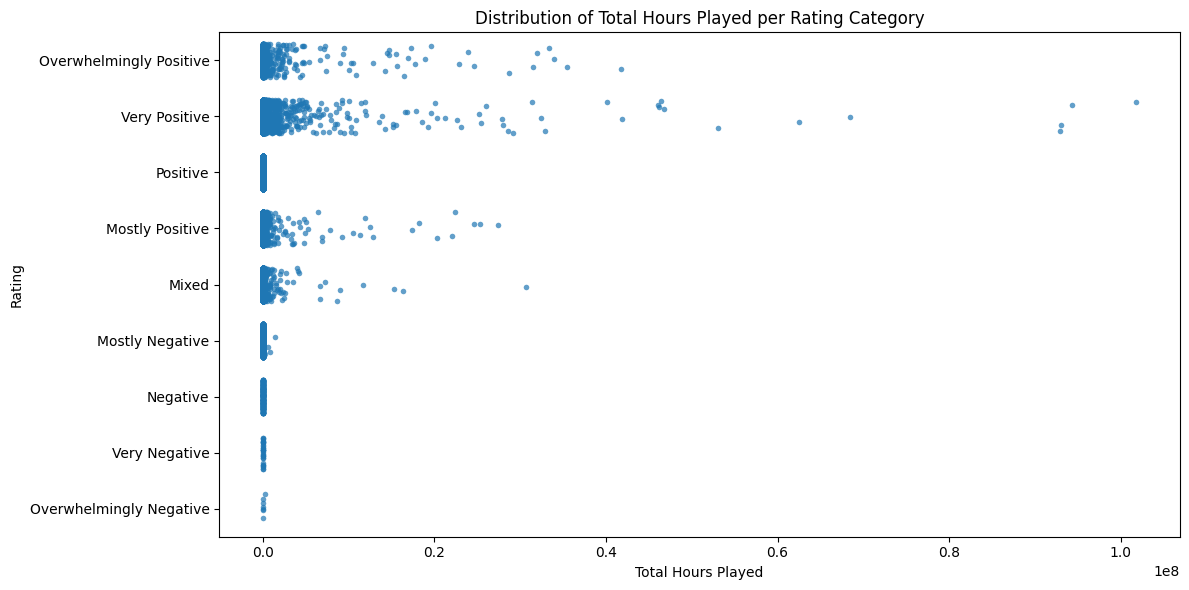

In [25]:
# Gabungkan DataFrame 'recommendations' dan 'games_data'
merged_data = pd.merge(recommendations, games_data[['app_id', 'rating']], on='app_id', how='left')

# Hitung total hours played untuk setiap game dan rating
game_hours_by_rating = merged_data.groupby(['app_id', 'rating'])['hours'].sum().reset_index()
game_hours_by_rating.columns = ['app_id', 'rating', 'total_hours_played']


# Urutkan rating agar ditampilkan secara berurutan di plot
rating_order = ["Overwhelmingly Positive", "Very Positive", "Positive", "Mostly Positive", "Mixed",
                "Mostly Negative", "Negative", "Very Negative", "Overwhelmingly Negative"]


# Buat strip plot menggunakan Seaborn
plt.figure(figsize=(12, 6))
sns.stripplot(x='total_hours_played', y='rating', data=game_hours_by_rating, order=rating_order, jitter=0.3, size=4, alpha=0.7) #jitter dan size bisa dimodifikasi sesuai kebutuhan
plt.title('Distribution of Total Hours Played per Rating Category')
plt.xlabel('Total Hours Played')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

Game yang memiliki ulasan rating yang positif dimainkan lebih banyak daripada yang negatif. Menunjukkan bahwa rating berpengaruh terhadap minat bermain.

#### **Percentage of Games per OS**

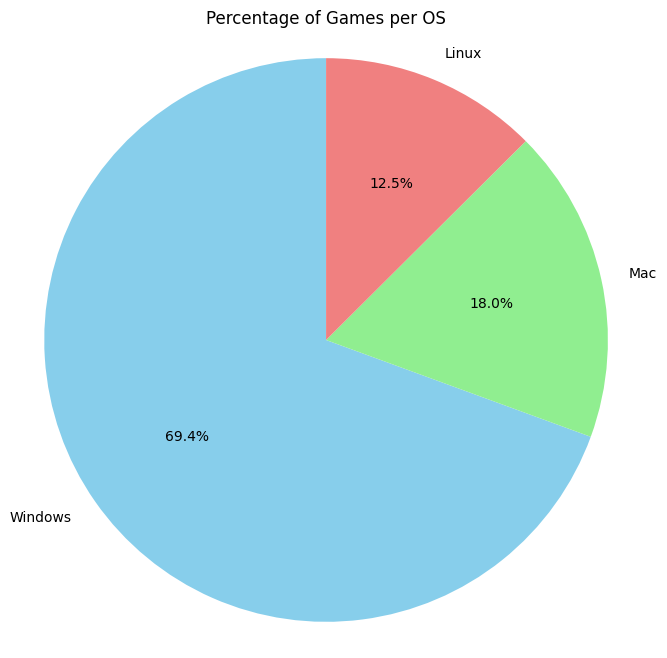

In [22]:
# Count games per OS
os_counts = games_data[['win', 'mac', 'linux']].sum()

# Create labels and data for pie chart
labels = ['Windows', 'Mac', 'Linux']
sizes = [os_counts['win'], os_counts['mac'], os_counts['linux']]

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Percentage of Games per OS')
plt.axis('equal')  # Make the pie chart circular

plt.show()

Jumlah Game yang rilis di platform windows mendominasi dengan 69.4%.

#### **Game Popularity per OS**

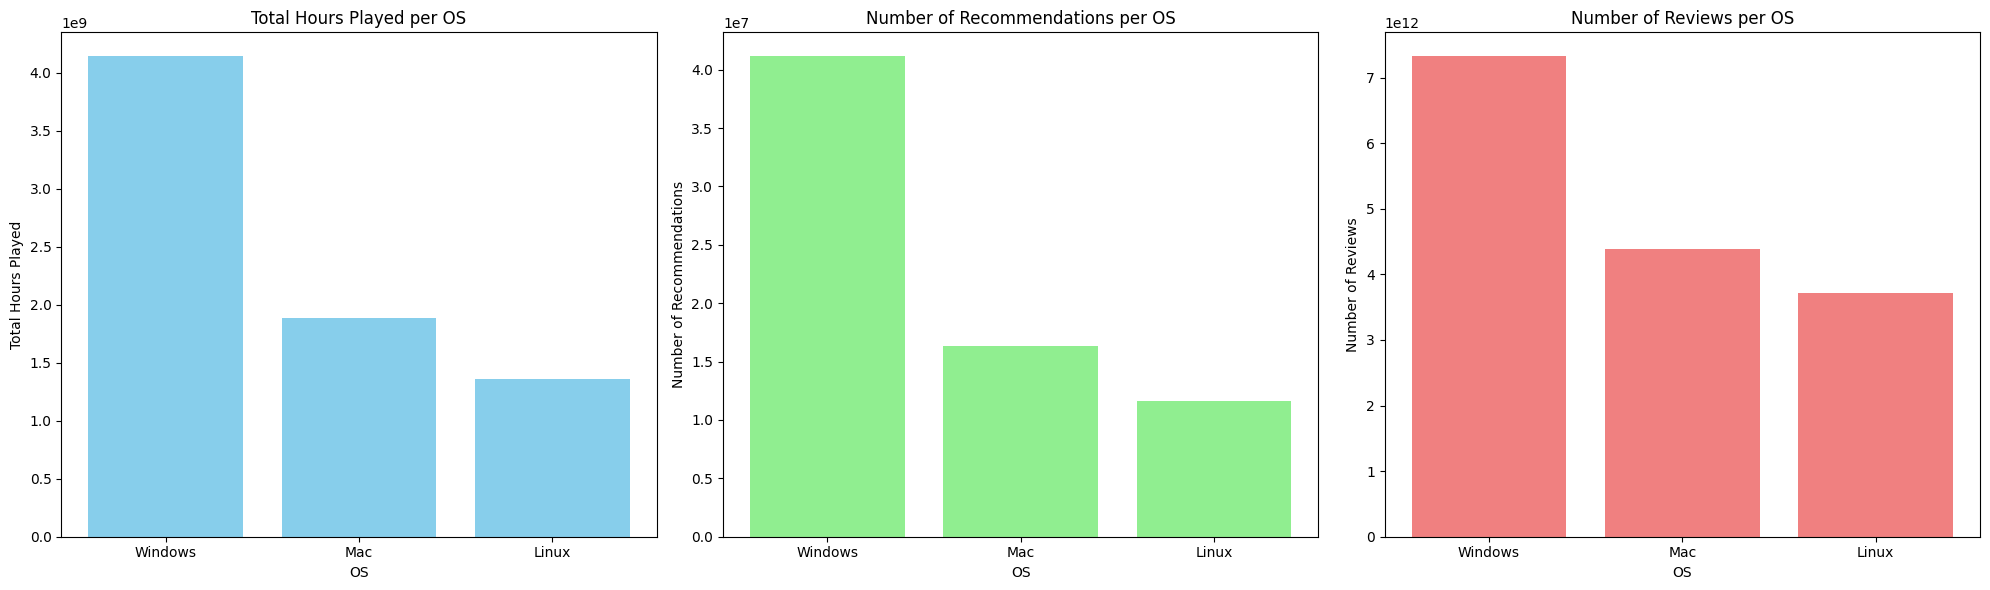

In [23]:
# --- Data Preparation ---
platform_hours = pd.merge(games_data[['app_id', 'win', 'mac', 'linux','user_reviews']], recommendations, on='app_id', how='inner')

# Total Hours Played per OS
windows_hours = platform_hours[platform_hours['win'] == True]['hours'].sum()
mac_hours = platform_hours[platform_hours['mac'] == True]['hours'].sum()
linux_hours = platform_hours[platform_hours['linux'] == True]['hours'].sum()
os_hours_data = pd.DataFrame({'OS': ['Windows', 'Mac', 'Linux'], 'Total Hours Played': [windows_hours, mac_hours, linux_hours]})

# Number of Recommendations per OS (Approximation - using game popularity as a proxy)
# Assuming more popular games are recommended more
windows_recommendations = platform_hours[platform_hours['win'] == True]['is_recommended'].count()
mac_recommendations = platform_hours[platform_hours['mac'] == True]['is_recommended'].count()
linux_recommendations = platform_hours[platform_hours['linux'] == True]['is_recommended'].count()
os_recommendations_data = pd.DataFrame({'OS': ['Windows', 'Mac', 'Linux'], 'Number of Recommendations': [windows_recommendations, mac_recommendations, linux_recommendations]})

# Number of Reviews per OS (Approximation - similar to recommendations)
windows_reviews = platform_hours[platform_hours['win'] == True]['user_reviews'].sum()
mac_reviews = platform_hours[platform_hours['mac'] == True]['user_reviews'].sum()
linux_reviews = platform_hours[platform_hours['linux'] == True]['user_reviews'].sum()
os_reviews_data = pd.DataFrame({'OS': ['Windows', 'Mac', 'Linux'], 'Number of Reviews': [windows_reviews, mac_reviews, linux_reviews]})


# --- Plotting ---

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot 1: Total Hours Played
axes[0].bar(os_hours_data['OS'], os_hours_data['Total Hours Played'], color='skyblue')
axes[0].set_xlabel('OS')
axes[0].set_ylabel('Total Hours Played')
axes[0].set_title('Total Hours Played per OS')

# Plot 2: Number of Recommendations
axes[1].bar(os_recommendations_data['OS'], os_recommendations_data['Number of Recommendations'], color='lightgreen')
axes[1].set_xlabel('OS')
axes[1].set_ylabel('Number of Recommendations')
axes[1].set_title('Number of Recommendations per OS')

# Plot 3: Number of Reviews
axes[2].bar(os_reviews_data['OS'], os_reviews_data['Number of Reviews'], color='lightcoral')
axes[2].set_xlabel('OS')
axes[2].set_ylabel('Number of Reviews')
axes[2].set_title('Number of Reviews per OS')

plt.tight_layout()
plt.show()

Terlihat ternyata game yang rilis di platform windows jauh lebih populer dari os lainnya. Namun ini bisa disebabkan juga karena lebih banyak game yang rilis di platform windows.

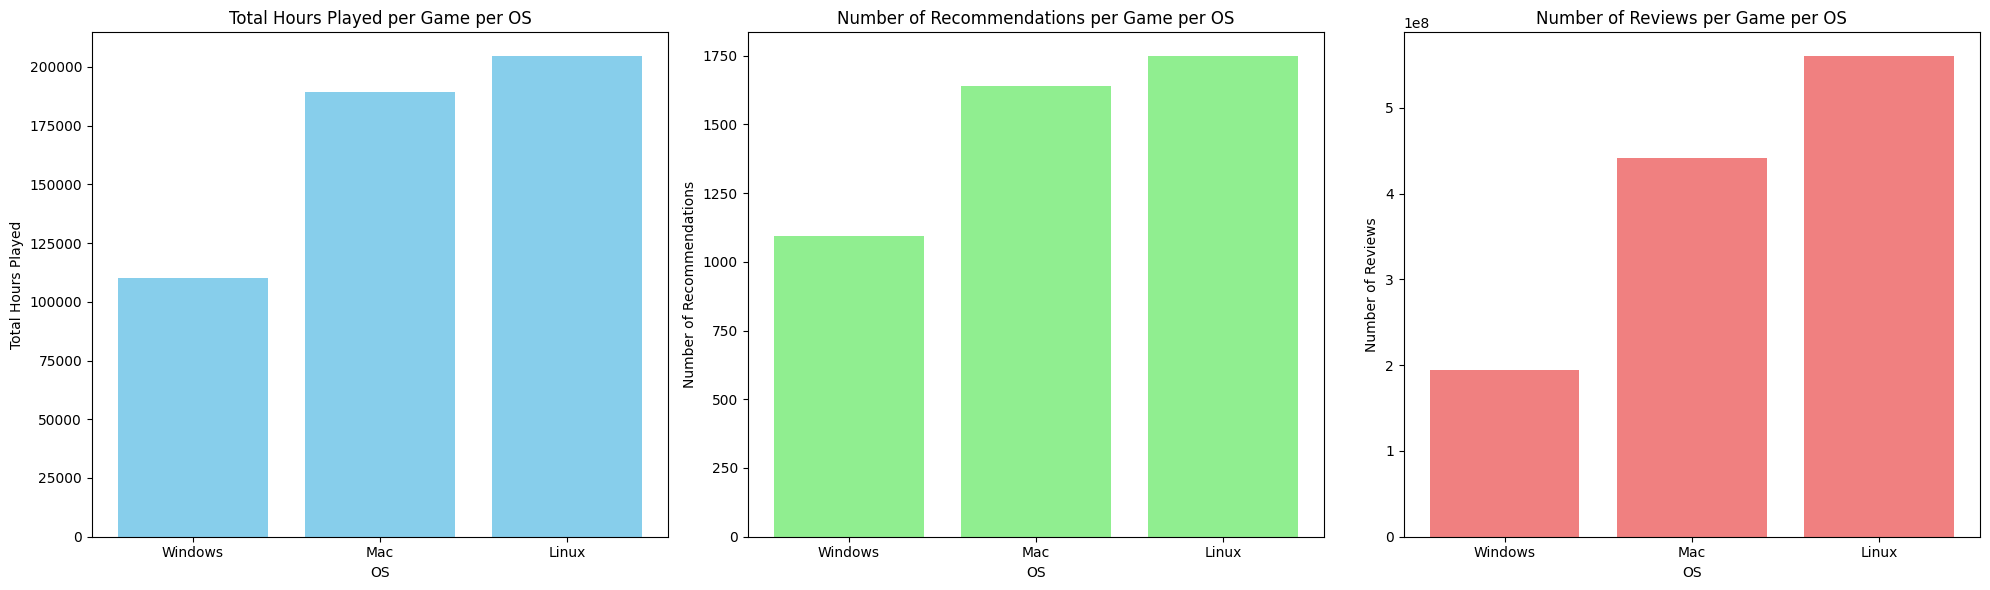

In [24]:
# Merging DataFrames
platform_hours = pd.merge(games_data[['app_id', 'win', 'mac', 'linux', 'user_reviews']],
                          recommendations[['app_id', 'is_recommended', 'hours']],
                          on='app_id', how='inner')

# --- Total Hours Played per OS ---
windows_hours = platform_hours[platform_hours['win'] == True]['hours'].sum()
mac_hours = platform_hours[platform_hours['mac'] == True]['hours'].sum()
linux_hours = platform_hours[platform_hours['linux'] == True]['hours'].sum()

# --- Number of Games per OS ---
windows_games = platform_hours[platform_hours['win'] == True]['app_id'].nunique()
mac_games = platform_hours[platform_hours['mac'] == True]['app_id'].nunique()
linux_games = platform_hours[platform_hours['linux'] == True]['app_id'].nunique()

# --- Number of Recommendations per OS ---
windows_recommendations = platform_hours[platform_hours['win'] == True]['is_recommended'].count()
mac_recommendations = platform_hours[platform_hours['mac'] == True]['is_recommended'].count()
linux_recommendations = platform_hours[platform_hours['linux'] == True]['is_recommended'].count()

# --- Number of Reviews per OS ---
windows_reviews = platform_hours[platform_hours['win'] == True]['user_reviews'].sum()
mac_reviews = platform_hours[platform_hours['mac'] == True]['user_reviews'].sum()
linux_reviews = platform_hours[platform_hours['linux'] == True]['user_reviews'].sum()

# --- Normalization ---
# Divide metrics by the number of games per OS
windows_hours_per_game = windows_hours / windows_games
mac_hours_per_game = mac_hours / mac_games
linux_hours_per_game = linux_hours / linux_games


windows_recommendations_per_game = windows_recommendations / windows_games
mac_recommendations_per_game = mac_recommendations / mac_games
linux_recommendations_per_game = linux_recommendations / linux_games


windows_reviews_per_game = windows_reviews / windows_games
mac_reviews_per_game = mac_reviews / mac_games
linux_reviews_per_game = linux_reviews / linux_games


# --- Create DataFrame for plotting ---
os_data = pd.DataFrame({
    'OS': ['Windows', 'Mac', 'Linux'],
    'Avg. Hours Played': [windows_hours_per_game, mac_hours_per_game, linux_hours_per_game],
    'Avg. Recommendations': [windows_recommendations_per_game, mac_recommendations_per_game, linux_recommendations_per_game],
    'Avg. Reviews': [windows_reviews_per_game, mac_reviews_per_game, linux_reviews_per_game]
})

# --- Plotting ---
# --- Plotting ---

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot 1: Total Hours Played
axes[0].bar(os_data['OS'], os_data['Avg. Hours Played'], color='skyblue')
axes[0].set_xlabel('OS')
axes[0].set_ylabel('Total Hours Played')
axes[0].set_title('Total Hours Played per Game per OS')

# Plot 2: Number of Recommendations
axes[1].bar(os_data['OS'], os_data['Avg. Recommendations'], color='lightgreen')
axes[1].set_xlabel('OS')
axes[1].set_ylabel('Number of Recommendations')
axes[1].set_title('Number of Recommendations per Game per OS')

# Plot 3: Number of Reviews
axes[2].bar(os_data['OS'], os_data['Avg. Reviews'], color='lightcoral')
axes[2].set_xlabel('OS')
axes[2].set_ylabel('Number of Reviews')
axes[2].set_title('Number of Reviews per Game per OS')

plt.tight_layout()
plt.show()


Jika memperhitungkan jumlah game yang dirilis di setiap platform, malah linux yang memiliki popularitas leih tinggi.

## **Data Preparation**

### **Data Cleaning**

#### **Missing Value & Duplicate**

Menilik dari nilai data yang ada, untuk mengetahui data yang kosong perlu dilakukan pre-processing terlebih dahulu karena missing value tidak berupa `None`, `Null` atau `NaN` tapi berupa empty string `''` , empty list `[]`, zero-value atau non-numerical value pada kolom numerik.

Jumlah *missing value* berupa empty string `''` dan empty list `[]` yang ada di dataframe `games_data` adalah sebagai berikut


In [58]:
games_data.replace('', None, inplace=True)
games_data = games_data.applymap(lambda x: None if isinstance(x, list) and len(x) == 0 else x)
pd.DataFrame({'Nilai yang Kosong':games_data.isna().sum()})

<ipython-input-58-2e4b781efb55>:2: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



,Nilai yang Kosong
app_id,0
description,10373
tags,1244
title,0
date_release,0
win,0
mac,0
linux,0
rating,0
positive_ratio,0


Dilakukan drop pada baris yang memiliki _missing value_ sehingga menghasilkan jumlah baris sebagai berikut

In [59]:
# Menghapus baris yang memiliki nilai null pada data
games_data.drop(games_data[games_data.isna().any(axis = 1)].index, inplace = True)

# Menampilkan jumlah baris dan kolom pada data setelah menghapus baris dengan nilai null
total_row, total_column = games_data.shape
print(f"Total of rows: {total_row}")
print(f"Total of column: {total_column}")

Total of rows: 40484
Total of column: 15


selanjutnya diperiksa nilai numerik yang menghasilkan nilai 0 pada dataframe `games_data`.

In [60]:
# Count the occurrences of 0.0 in each column
zero_counts = games_data.apply(lambda col: col.apply(lambda x: isinstance(x, float) and x == 0.0).sum())

# Convert to a table format
zero_count_table = zero_counts.reset_index()
zero_count_table.columns = ["Column", "Count of 0.0"]

pd.DataFrame({'Nilai yang bernilai 0':zero_counts})



,Nilai yang bernilai 0
app_id,0
description,0
tags,0
title,0
date_release,0
win,0
mac,0
linux,0
rating,0
positive_ratio,0


Terdapat nilai 0 di dalam kolom yang memiliki kepentingan yaitu kolom `price_final`. Maka baris yang memiliki nilai 0 tersebut dihilangkan, sedangkan nilai 0 di baris lainnya dibiarkan karena tidak relevan dan malah akan menghilangkan data penting ketika dihilangkan.

In [61]:
games_data.drop(index=games_data[games_data['price_final'] == 0.0].index, inplace=True)

total_row, total_column = games_data.shape
print(f"Total of rows: {total_row}")
print(f"Total of column: {total_column}")


Total of rows: 32685
Total of column: 15


Dilakukan deteksi adanya data non-numerik di kolom-kolom numerik. Data yang terdeteksi akan diubah menjadi NaN untuk dihilangkan menggunakan `dropna()`.

In [62]:
# Handle non-numeric values in numeric columns by coercing them into NaN
games_data[['positive_ratio', 'user_reviews', 'price_final']] = (
    games_data[['positive_ratio', 'user_reviews', 'price_final']]
    .apply(pd.to_numeric, errors='coerce')
)
# Drop rows with NaN values in critical columns after conversion
games_data = games_data.dropna(subset=['rating', 'positive_ratio', 'user_reviews', 'price_final'])


total_row, total_column = games_data.shape
print(f"Total of rows: {total_row}")
print(f"Total of column: {total_column}")


Total of rows: 32685
Total of column: 15


Diperiksa juga _missing value_ dan data invalid di kolom numerik pada dataframe `recommendations`

In [49]:
recommendations.replace('', None, inplace=True)
recommendations[['helpful', 'funny', 'hours']] = (
    recommendations[['helpful', 'funny', 'hours']]
    .apply(pd.to_numeric, errors='coerce')
)
pd.DataFrame({'Nilai yang Kosong':recommendations.isna().sum()})

,Nilai yang Kosong
app_id,0
helpful,0
funny,0
date,0
is_recommended,0
hours,0
user_id,0
review_id,0


tidak ada _missing value_ yang harus dihilangkan

Penghilangan nilai 0 tidak dilakukan pada dataframe `recommendations` karena kolom penting `hours` berisi banyak data nilai 0 yang berarti user tidak memiliki cukup waktu bermain game yang user tersebut ulas.

Selanjutnya diperiksa data duplikat pada dataframe `games_data`

In [48]:
# Get a list of columns excluding the one with lists
columns_to_check = [col for col in games_data.columns if col != 'tags']

# Check for duplicates only in the specified subset of columns
duplicates = games_data.duplicated(subset=columns_to_check).sum()

print(f"Number of duplicates (excluding 'tags' column): {duplicates}")

Number of duplicates (excluding 'tags' column): 0


Diperiksa juga data duplikat pada dataframe `recommendations`

In [ ]:
# Check for duplicates only in the specified subset of columns
duplicates = recommendations.duplicated(subset='review_id').sum()

print(f"Number of duplicates : {duplicates}")

Number of duplicates : 0


Tidak terdeteksi data duplikat pada kedua dataframe sehingga tidak perlu dihilangkan.


In [56]:
# Show total rows and total column of the data
total_row, total_column = games_data.shape
print(f"Total rows of games_data: {total_row}")
print(f"Total columns of games_data: {total_column}")
total_row, total_column = recommendations.shape
print(f"Total rows of recommendations: {total_row}")
print(f"Total columns of recommendations: {total_column}")

Total rows of games_data: 32685
Total columns of games_data: 15
Total rows of recommendations: 41154794
Total columns of recommendations: 8


Jumlah data di `games_data` setelah cleaning adalah 32685 dan di `recommendations` adalah 41154794

#### **Data Reduction**

Dilakukan filter game yang dianggap relevan di dataframe `recommendations` dengan menggunakan data dari dataframe `games_data` yang telah dihilangkan *missing value*-nya. Hasilnya sebagai berikut

In [65]:
games_list = games_data['app_id'].unique()
recommendations = recommendations[recommendations['app_id'].isin(games_list)]

total_row, total_column = recommendations.shape
print(f"Total of rows: {total_row}")
print(f"Total of column: {total_column}")
recommendations.head()
recommendations.info()


Total of rows: 16337800
Total of column: 8
<class 'pandas.core.frame.DataFrame'>
Index: 16337800 entries, 66 to 41154792
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   app_id          int64  
 1   helpful         int64  
 2   funny           int64  
 3   date            object 
 4   is_recommended  bool   
 5   hours           float64
 6   user_id         int64  
 7   review_id       int64  
dtypes: bool(1), float64(1), int64(5), object(1)
memory usage: 1012.8+ MB


Karena ukuran data yang masih terlalu besar yaitu 16337800 data maka dilakukan sampling dengan kriteria seperti berikut: data tidak lebih lama dari tahun 2020, setiap interval dari total waktu dimainkan dari setiap game akan diambil 200 game relevan, setiap user relevan memiliki minimal 5 review game.

Setelah dilakukan filter melalui data game setelah tahun 2020.

In [66]:
start_date = '2020-01-01'
filtered_data = recommendations[(recommendations['date'] >= start_date) ]

print(f"Number of rows after date filtering: {filtered_data.shape[0]}")

Number of rows after date filtering: 9024102


Disampling 200 game pada setiap kelas data dari kolom ‘hours’ yang diagreasi dari setiap game lalu diurutkan dan dibuat 10 kelas interval.



In [67]:
# Calculate review count per total game hours
game_counts = filtered_data.groupby('app_id')['hours'].count().reset_index()
game_counts.columns = ['app_id', 'hours_count']

# Create bins for stratification
num_bins = 10  # Example: 5 bins
game_counts['hours_bin'] = pd.qcut(game_counts['hours_count'], q=num_bins, labels=False)

# Sample exactly 100 games from each review_bin
sampled_games_by_bin = game_counts.groupby('hours_bin').apply(lambda x: x.sample(n=200, random_state=42) if len(x) >= 100 else x)

# Extract the unique app_ids from the sampled games
sampled_app_ids = sampled_games_by_bin['app_id'].unique()

# Filter filtered_data to include only reviews for sampled app_ids
filtered_sampled_data = filtered_data[filtered_data['app_id'].isin(sampled_app_ids)]

# Step 3: Print the number of rows in the resulting dataset
print(f"Number of sampled games: {len(sampled_app_ids)}")
print(f"Number of rows in the filtered dataset: {len(filtered_sampled_data)}")



Number of sampled games: 2000
Number of rows in the filtered dataset: 675275


<ipython-input-67-62cb50db1a21>:10: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [68]:
# Filter out users with fewer than 5 games
user_review_counts = filtered_sampled_data.groupby('user_id')['app_id'].count().reset_index()
user_review_counts.columns = ['user_id', 'app_count']

# Filter users who have 5 or more reviews
users_with_min_reviews = user_review_counts[user_review_counts['app_count'] >= 5]['user_id']

# Filter the main dataset to include only users with at least 5 reviews
filtered_min_reviews = filtered_sampled_data[filtered_sampled_data['user_id'].isin(users_with_min_reviews)]

print(f"Number of user with min reviews: {len(users_with_min_reviews)}")
print(f"Number of rows in the filtered dataset: {len(filtered_min_reviews)}")

recommendations= pd.DataFrame(filtered_min_reviews)


Number of user with min reviews: 4235
Number of rows in the filtered dataset: 34586


Jumlah entri data `games_data` setelah dibersihkan adalah 32685 dan jumlah baris setelah reduksi dari data `recommendations` adalah 34586

In [77]:
games_data = games_data.reset_index(drop=True)
recommendations = recommendations.reset_index(drop=True)

### **1. Content Based Filtering**



Dataframe dari `games_data`  dianalisis kolomnya untuk ditemukan kolom yang sesuai dalam penghitungan `cosine similarity`.



In [42]:
# Create a copy of games_data to ensure the original DataFrame remains unchanged
content_based_data = games_data.copy()


Ditentukan bahwa kolom informasi yang digunakan yaitu 'description', 'tags', 'title', 'rating', 'positive_ratio', 'user_reviews', 'price_final'. Kolom `descriptions` dan `tags` akan digunakan *feature*nya dari konversi TF-IDF sedangkan kolom `rating`, `positive_ratio`, `user_reviews`, `price_final` akan digunakan sebagai *feature* nilai numeriknya.
Kolom lain yang tidak termasuk akan di-drop dari dataframe.

In [43]:
# Drop unnecessary columns
content_based_data = content_based_data[['app_id', 'description', 'tags', 'title', 'rating', 'positive_ratio', 'user_reviews', 'price_final']]

Kolom tag yang berisi list tag apa saja yang ada di sebuah game, dipecah menjadi satu kumpulan string dipisahkan oleh spasi yang bisa diterima sebagai corpus oleh TfidfVectorizer. Namun sebelum dipecah beberapa tag yang berisi lebih dari satu kata seperti `Local Co-Op`, `Third Person`, `Tower Defense` disatukan menjadi satu kata dengan mengganti spasi dengan underscore '_' agar menjadi seperti ini `Local_Co-Op`, `Third_Person`, `Tower_Defense`.

In [44]:
# Replace spaces within multi-word tags with underscores
content_based_data['tags'] = content_based_data['tags'].apply(
    lambda x: [tag.strip().replace(' ', '_') for tag in x]
)

# Join tags into a single string for each game
content_based_data['tags'] = content_based_data['tags'].apply(lambda x: ' '.join(x))

rating di-encode agar dapat dimengerti oleh cosine similarity

In [45]:
# Convert the rating column (text to numeric)
rating_mapping = {
    'Overwhelmingly Positive': 5,
    'Very Positive': 4,
    'Positive': 3,
    'Mildly Positive': 2,
    'Mixed': 1,
    'Mildly Negative': -1,
    'Negative': -2,
    'Very Negative': -3,
    'Overwhelmingly Negative': -4
}

content_based_data['rating'] = content_based_data['rating'].map(rating_mapping)

In [46]:
content_based_data.head()
content_based_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32685 entries, 0 to 50870
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          32685 non-null  int64  
 1   description     32685 non-null  object 
 2   tags            32685 non-null  object 
 3   title           32685 non-null  object 
 4   rating          25806 non-null  float64
 5   positive_ratio  32685 non-null  int64  
 6   user_reviews    32685 non-null  int64  
 7   price_final     32685 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 2.2+ MB


#### **Hyper-Parameter Tuning**

**GridSearch for TF-IDF**

Digunakan GridSearch untuk mengoptimalkan proses vektorisasi TF-IDF dari deskripsi game yang memiliki deretan string yang panjang. Yaitu dengan optimasi parameter sebagai berikut: max_features yaitu berapa variasi kata yang akan digunakan model, ngram yaitu jenis urutan kata yang digunakan apakah unigrams (1 kata) atau bigrams (2 kata), max_df adalah jumlah maksimal persentase sebuah kata muncul yaitu jika sebuah kata muncul terlalu banyak maka maknanya hilang, min_df yaitu sebaliknya jika sebuah kata hanya muncul dalam sedikit dokumen maka tidak relevan maka nilai ini adalah jumlah dokumen minimal sebuah kata muncul. Parameter pengujian digunakan KNN karena algoritma tersebut adalah clustering yang sesuai dengan tujuan vektorisasi TF-IDF.

In [ ]:
# Corpus of text data (no labels)
corpus = content_based_data['description'].values

# Set up a pipeline with TfidfVectorizer and KMeans
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('kmeans', KMeans())
])

# Define the parameter grid for GridSearchCV
param_grid = {
    # TfidfVectorizer parameters
    'tfidf__max_features': [100, 500, 1000, 5000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],  # Unigrams, Bigrams
    'tfidf__max_df': [0.75, 0.85, 1.0],  # Words appearing in up to 75%, 85%, or 100% of documents
    'tfidf__min_df': [1, 2, 5],  # Words appearing in at least 1, 2, or 5 documents

    # KMeans clustering parameters
    'kmeans__n_clusters': [2, 3, 4],  # Number of clusters for KMeans
    'kmeans__init': ['k-means++', 'random'],  # Initialization method for KMeans
    'kmeans__max_iter': [100, 300]  # Maximum number of iterations for KMeans
}

# Set up GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, verbose=1)

# Fit the grid search to the data (no labels)
grid_search.fit(corpus)

# Output the best parameters and score (in this case, no labels, so we just show the best combination)
print("Best parameters found: ", grid_search.best_params_)


Fitting 3 folds for each of 864 candidates, totalling 2592 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters found:  {'kmeans__init': 'random', 'kmeans__max_iter': 300, 'kmeans__n_clusters': 4, 'tfidf__max_df': 1.0, 'tfidf__max_features': 100, 'tfidf__min_df': 5, 'tfidf__ngram_range': (1, 2)}


#### **Vectorizer**

Digunakan TF-IDF dengan nilai dari 0 hingga 1 untuk data berupa teks yaitu deskripsi dan tags. Khusus untuk data deskripsi digunakan parameter hasil parameter tuning sedangkan untuk data tags tidak menggunakan parameter tuning karena data tags masing-masing berdiri sendiri tanpa konteks yang berkaitan. Data numerikal di-vektorisasi menggunakan min-max scaler yang menghasilkan nilai dari 0 hingga 1.

In [ ]:
#description tfidf
tfidf_desc = TfidfVectorizer(stop_words='english', max_df= 1.0, max_features= 100, min_df= 5, ngram_range=(1, 2))
description_tfidf = tfidf_desc.fit_transform(content_based_data['description'])

#tags tfdf
tfidf_tags = TfidfVectorizer()
tags_tfidf = tfidf_tags.fit_transform(content_based_data['tags'])

# Extract numerical features and create a sparse matrix
num_features = ['rating', 'positive_ratio', 'user_reviews', 'price_final']
numerical_features_array = content_based_data[num_features].values

# Scale the sparse matrix
scaler = MinMaxScaler()
scaled_num_features = scaler.fit_transform(numerical_features_array)
sparse_num_features = csr_matrix(numerical_features_array)

#### **Feature Engineering**

In [ ]:
combined_feature= hstack([description_tfidf, tags_tfidf,sparse_num_features])

Tiga vektor yang telah dibuat digabungkan seluruh kolomnya menghasilkan data vektor gabungan tf-idf dan numerikal yaitu Combined Features. Hal ini dilakukan untuk melihat keterkaitan yang lebih kompleks dari data yang ada.

#### **Data Vector**

**Vector TF-IDF Descriptions**

In [ ]:
pd.DataFrame(
    description_tfidf.todense(),
    columns = tfidf_desc.get_feature_names_out(),
    index = content_based_data.title
)

,2d,3d,action,adventure,adventure game,arcade,based,battle,beautiful,best,...,turn based,unique,use,using,visual,vr,war,way,weapons,world
title,,,,,,,,,,,,,,,,,,,,,
Prince of Persia: Warrior Within™,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
Monaco: What's Yours Is Mine,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
Escape Dead Island,0.000000,0.000000,0.000000,0.390487,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
Dungeon of the ENDLESS™,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.332654,0.000000,0.000000
METAL SLUG 3,0.531413,0.000000,0.413478,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dragon Princess is Hungry,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
XENOTILT: HOSTILE PINBALL ACTION,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
Taboo Trial,0.000000,0.429329,0.319287,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.38721,0.0,0.0,0.0,0.0,0.000000,0.000000,0.258898


**Vector TF-IDF Tags**

In [ ]:
pd.DataFrame(
    tags_tfidf.todense(),
    columns = tfidf_tags.get_feature_names_out(),
    index = content_based_data.title
)

,1980s,1990,2d,2d_fighter,2d_platformer,360_video,3d,3d_fighter,3d_platformer,3d_vision,...,well,werewolves,western,wholesome,word_game,world_war_i,world_war_ii,wrestling,written,zombies
title,,,,,,,,,,,,,,,,,,,,,
Prince of Persia: Warrior Within™,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Monaco: What's Yours Is Mine,0.0,0.0,0.110829,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Escape Dead Island,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.275537
Dungeon of the ENDLESS™,0.0,0.0,0.133778,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
METAL SLUG 3,0.0,0.0,0.111907,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dragon Princess is Hungry,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
XENOTILT: HOSTILE PINBALL ACTION,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Taboo Trial,0.0,0.0,0.000000,0.0,0.0,0.0,0.185710,0.0,0.275645,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


**Vector Numerical Features**

In [ ]:
pd.DataFrame(
    sparse_num_features.todense(),
    columns = num_features,
    index = content_based_data.title
)

,rating,positive_ratio,user_reviews,price_final
title,,,,
Prince of Persia: Warrior Within™,4.0,84.0,2199.0,9.99
Monaco: What's Yours Is Mine,4.0,92.0,3722.0,14.99
Escape Dead Island,1.0,61.0,873.0,14.99
Dungeon of the ENDLESS™,4.0,88.0,8784.0,11.99
METAL SLUG 3,4.0,90.0,5579.0,7.99
...,...,...,...,...
Dragon Princess is Hungry,4.0,96.0,85.0,16.00
XENOTILT: HOSTILE PINBALL ACTION,4.0,98.0,180.0,15.00
Taboo Trial,4.0,94.0,494.0,12.00


**Vector Combined Features**

In [ ]:
pd.DataFrame(
    combined_feature.todense(),
    columns = tfidf_desc.get_feature_names_out().tolist() + tfidf_tags.get_feature_names_out().tolist() + num_features,
    index = content_based_data.title
)

,2d,3d,action,adventure,adventure game,arcade,based,battle,beautiful,best,...,word_game,world_war_i,world_war_ii,wrestling,written,zombies,rating,positive_ratio,user_reviews,price_final
title,,,,,,,,,,,,,,,,,,,,,
Prince of Persia: Warrior Within™,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,4.0,84.0,2199.0,9.99
Monaco: What's Yours Is Mine,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,4.0,92.0,3722.0,14.99
Escape Dead Island,0.000000,0.000000,0.000000,0.390487,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.275537,1.0,61.0,873.0,14.99
Dungeon of the ENDLESS™,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,4.0,88.0,8784.0,11.99
METAL SLUG 3,0.531413,0.000000,0.413478,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,4.0,90.0,5579.0,7.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dragon Princess is Hungry,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,4.0,96.0,85.0,16.00
XENOTILT: HOSTILE PINBALL ACTION,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,4.0,98.0,180.0,15.00
Taboo Trial,0.000000,0.429329,0.319287,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,4.0,94.0,494.0,12.00


### **2. Collaborative Filtering**

Berikut ini dataframe dari recommendations yang dianalisis kolomnya untuk ditemukan data mana yang dapat digunakan untuk melatih model deep learning RecommenderNet.

In [78]:
colab_based_data=recommendations.copy()

In [79]:
colab_based_data.head()

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,601840,0,0,2020-06-18,True,51.3,4591253,6126607
1,999220,2,0,2022-04-05,True,8.8,9089111,6128126
2,1090630,0,0,2022-06-06,False,10.1,6138998,6129816
3,1812090,2,0,2022-07-14,True,0.7,13271495,6136413
4,1090630,52,0,2021-12-14,True,241.4,12053923,6140311


Digunakan data `is_recommended` dan `hours` sebagai parameter untuk model deep learning. Kolom lain yang tidak dibutuhkan didrop.

In [70]:
# Drop unnecessary columns
colab_based_data = colab_based_data[['user_id', 'app_id', 'is_recommended', 'hours']]

#### **Encoding Map**

Dilakukan pembuatan map encoding terhadap user_id dan app_id menjadi nilai integer ordinal untuk menyederhanakan data. Map untuk mengkonversi ulang nilai encoding ke semula juga dibuat untuk melihat hasil rekomendasi. Lalu sebagian output dari map-nya ditampilkan sebagai berikut

In [63]:
# Encode user_id and app_id as integers
user = colab_based_data['user_id'].unique()
app = colab_based_data['app_id'].unique()
user_id_map = {id_: idx for idx, id_ in enumerate(user)}
user_id_remap = {idx: id_ for id_, idx in user_id_map.items()}
app_id_map = {id_: idx for idx, id_ in enumerate(app)}
app_id_remap = {idx: id_ for id_, idx in app_id_map.items()}
# Convert the dictionaries to lists of items before slicing for printing
print(f'app_id ke ordinal: {list(app_id_map.items())[:11]}') # Convert app_id_map to list of items
print(f'user_id ke ordinal: {list(user_id_map.items())[:11]}') # Convert user_id_map to list of items
print(f'ordinal app_id ke semula : {list(app_id_remap.items())[:11]}') # Convert app_id_remap to list of items
print(f'ordinal user_id ke semula: {list(user_id_remap.items())[:11]}') # Convert user_id_remap to list of items

app_id ke ordinal: [(601840, 0), (999220, 1), (1090630, 2), (1812090, 3), (363440, 4), (976590, 5), (586200, 6), (1147560, 7), (874390, 8), (851890, 9), (577690, 10)]
user_id ke ordinal: [(4591253, 0), (9089111, 1), (6138998, 2), (13271495, 3), (12053923, 4), (13219396, 5), (2622846, 6), (3366677, 7), (14088822, 8), (11451103, 9), (13112500, 10)]
ordinal app_id ke semula : [(0, 601840), (1, 999220), (2, 1090630), (3, 1812090), (4, 363440), (5, 976590), (6, 586200), (7, 1147560), (8, 874390), (9, 851890), (10, 577690)]
ordinal user_id ke semula: [(0, 4591253), (1, 9089111), (2, 6138998), (3, 13271495), (4, 12053923), (5, 13219396), (6, 2622846), (7, 3366677), (8, 14088822), (9, 11451103), (10, 13112500)]


Data user_id dan app_id di-encode sebagai dataframe baru berisi nilai-nilai representasi integer dari mapping yang telah dibuat sebelumnya. Output hasil mapping ini yang ditraining melalu model deep learning `RecommenderNet`. Sebagian data ditampilkan sebagai berikut

In [64]:
# Create a new DataFrame with encoded user_id and app_id
encoded_data = pd.DataFrame({
    'user_encoded': colab_based_data['user_id'].map(user_id_map),
    'app_encoded': colab_based_data['app_id'].map(app_id_map)
})
encoded_data.head(10)

,user_encoded,app_encoded
0,0,0
1,1,1
2,2,2
3,3,3
4,4,2
5,5,2
6,6,4
7,7,2
8,8,2
9,9,5


#### **Feature Engineering**

Data "hours" disesuaikan berdasarkan data game direkomendasikan atau tidak. Jika game direkomendasikan (is_recommended bernilai True), maka nilai  "hours" dengan dikalikan 1.25, dan jika tidak direkomendasikan, maka dikalikan dengan 0.75. Setelah itu dibuat kolom baru dalam dataframe sebagai `adjusted_hours`.

$$
\text{adjusted_hours} =
\begin{cases}
\text{hours} \times 1.25 & \text{jika } \text{is_recommended} = \text{True} \\
\text{hours} \times 0.75 & \text{jika } \text{is_recommended} = \text{False}
\end{cases}
$$

In [80]:
colab_based_data['adjusted_hours'] = colab_based_data.apply(lambda row: row['hours'] * 1.25 if row['is_recommended'] else row['hours'] * 0.75, axis=1)

#### **Data Normalization**

Data `hours` dan `adjusted_hours` dinormalisasi dengan MinMaxScaler() agar data berada di rentang 0 hingga 1 sehingga model jadi lebih sederhana dan metrik evaluasi lebih mudah untuk dibandingkan. Data tersebut disimpan masing-masing dalam list baru agar data aslinya dapat digunakan dalam mengurutkan rekomendasi.

In [90]:
scaler = MinMaxScaler()
hours = scaler.fit_transform(colab_based_data[['hours']])
scaler = MinMaxScaler()
hours = scaler.fit_transform(colab_based_data[['hours']])
adjusted_hours = scaler.fit_transform(colab_based_data[['adjusted_hours']])

# Print the header with a border
print("+" + "-" * 30 + "+" + "-" * 30 + "+")
print(f"| {'hours':<28} | {'adjusted_hours':<28} |")
print("+" + "-" * 30 + "+" + "-" * 30 + "+")

# Print the data rows with a border between each row
for h, adj_h in zip(hours[:10], adjusted_hours[:10]):
    print(f"| {h[0]:<28} | {adj_h[0]:<28} |")
    print("+" + "-" * 30 + "+" + "-" * 30 + "+")

+------------------------------+------------------------------+
| hours                        | adjusted_hours               |
+------------------------------+------------------------------+
| 0.05135649214135549          | 0.05135649214135549          |
+------------------------------+------------------------------+
| 0.0088096906597257           | 0.008809690659725698         |
+------------------------------+------------------------------+
| 0.010111122234457903         | 0.006066673340674742         |
+------------------------------+------------------------------+
| 0.000700770847932726         | 0.000700770847932726         |
+------------------------------+------------------------------+
| 0.24166583241565723          | 0.24166583241565723          |
+------------------------------+------------------------------+
| 0.022925217739513466         | 0.022925217739513466         |
+------------------------------+------------------------------+
| 0.013414756231855042         | 0.01341

#### **Train Test Split**

Dibuat 3 set data train-test dengan komposisi 8:2 untuk 3 model berbeda. Model pertama menggunakan data `hours` yang telah dinormalisasi minmaxscaler, lalu data kedua menggunakan data `is_recommended` yang bernilai boolean, data kedua menggunakan data adjusted_hours yang menggabungkan parameter `hours` dan `is_recommended`. Data user_id dan app_id diambil dari data yang telah di-encode sebelumnya yaitu `encoded_data`

In [67]:
# Prepare training data
X_1 = encoded_data[['user_encoded', 'app_encoded']].values
y_1 = hours
train_X_1, test_X_1, train_y_1, test_y_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

In [ ]:
# Prepare training data
X_2 = encoded_data[['user_encoded', 'app_encoded']].values
y_2 = colab_based_data['is_recommended']
train_X_2, test_X_2, train_y_2, test_y_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

In [68]:

# adjusted_hours = adjusted_hours.flatten()
# Prepare training data
X_3 = encoded_data[['user_encoded', 'app_encoded']].values
y_3 = adjusted_hours
train_X_3, test_X_3, train_y_3, test_y_3 = train_test_split(X_3, y_3, test_size=0.2, random_state=42)


## **Modeling & Result**



### **1. Content Based Filtering**

Model Content-Based Filtering dengan Cosine Similarity menggunakan informasi yang ada pada item itu sendiri, seperti deskripsi, tag, dan fitur numerik, untuk memberikan rekomendasi berdasarkan kemiripan dengan item lain. Pada model berbasis deskripsi, kemiripan dihitung berdasarkan teks deskripsi game, yang memberikan rekomendasi berdasarkan konten game itu sendiri. Model berbasis tag menggunakan kategori atau genre game, sedangkan model berbasis fitur numerik memanfaatkan data seperti rating, harga, dan waktu dimainkan untuk menentukan kemiripan. Gabungan ketiga model ini memberikan pendekatan yang lebih komprehensif dan akurat, karena menggabungkan berbagai jenis informasi. Kelebihan utama dari model content-based adalah kemampuannya memberikan rekomendasi untuk item baru tanpa membutuhkan data interaksi pengguna, namun kelemahannya adalah tidak mempertimbangkan preferensi pengguna secara langsung. Dibandingkan dengan Collaborative Filtering, yang lebih bergantung pada interaksi pengguna dan lebih personal, model content-based tidak mengalami masalah pada item baru namun bisa kesulitan memahami preferensi yang lebih kompleks dan subjektif.

#### **Cosine Similarity**

Content-based filtering menggunakan cosine similarity sebagai algoritma untuk membangun sistem rekomendasi berbasis konten. Cosine similarity mengukur kesamaan antara dua vektor dan menentukan sejauh mana kedua vektor tersebut mengarah ke arah yang sama. Ini dihitung dengan melihat sudut cosinus antara dua vektor, di mana semakin kecil sudutnya, semakin besar nilai cosine similarity. Rumusnya adalah sebagai berikut:


\begin{aligned}
\text{Cos}(\theta) &= \frac{\sum_{i=1}^n a_i b_i}{\sqrt{\sum_{i=1}^n a_i^2} \sqrt{\sum_{i=1}^n b_i^2}} \\
a_i &\text{ adalah elemen ke-} i \text{ dari vektor } a \\
b_i &\text{ adalah elemen ke-} i \text{ dari vektor } b \\
n   &\text{ adalah jumlah elemen dalam vektor } a \text{ dan } b
\end{aligned}



 Cosine similarity memiliki beberapa kelebihan, seperti output yang ternormalisasi dalam rentang -1 hingga 1, sehingga memudahkan interpretasi. Selain itu, metode ini sederhana dan efisien untuk menangani data sparse berdimensi tinggi, seperti yang dihasilkan oleh TF-IDF. Namun, terdapat juga kelemahan, seperti asumsi bahwa semua faktor atau parameter dianggap sama penting, sensitivitas terhadap perubahan kecil pada 'sudut vektor', serta kurang cocok untuk data yang mengandung nilai negatif. Setelah sistem rekomendasi ini dibangun menggunakan deskripsi, tag, dan fitur numerik dari game, serta diujicobakan untuk menampilkan 10 rekomendasi teratas berdasarkan interaksi pengguna dengan game, hasil yang diperoleh akan memberikan gambaran tentang efektivitas model ini dalam memberikan rekomendasi.

In [ ]:
# **1. Cosine Similarity on Vectorized Description**
cosine_sim_desc = cosine_similarity(description_tfidf)

# **2. Cosine Similarity on TF-IDF of Tags**
# Process tags
cosine_sim_tags = cosine_similarity(tags_tfidf)

# **3. Cosine Similarity on Scaled Numerical Features**
# Compute cosine similarity for numerical features
cosine_sim_num = cosine_similarity(sparse_num_features)

# **4. Cosine Similarity Combined**
cosine_sim_comb = cosine_similarity(combined_feature)

# **Results**
print("Cosine Similarity (Description):\n", cosine_sim_desc)
print("\nCosine Similarity (Tags):\n", cosine_sim_tags)
print("\nCosine Similarity (Numerical Features):\n", cosine_sim_num)
print("\nCosine Similarity (Combined):\n", cosine_sim_comb)


Cosine Similarity (Description):
 [[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.05592466 0.0732246  0.        ]
 [0.         0.         1.         ... 0.         0.24206936 0.        ]
 ...
 [0.         0.05592466 0.         ... 1.         0.13331241 0.12111781]
 [0.         0.0732246  0.24206936 ... 0.13331241 1.         0.        ]
 [0.         0.         0.         ... 0.12111781 0.         1.        ]]

Cosine Similarity (Tags):
 [[1.         0.0969941  0.27189149 ... 0.20927786 0.08182288 0.10948213]
 [0.0969941  1.         0.27368616 ... 0.05425411 0.00939756 0.027657  ]
 [0.27189149 0.27368616 1.         ... 0.18099251 0.08476883 0.20874065]
 ...
 [0.20927786 0.05425411 0.18099251 ... 1.         0.10707272 0.15243276]
 [0.08182288 0.00939756 0.08476883 ... 0.10707272 1.         0.12431625]
 [0.10948213 0.027657   0.20874065 ... 0.15243276 0.12431625 1.        ]]

Cosine Similarity (Numerical Features):
 [[1.    

#### **Result**

Rekomendasi ditemukan dengan cara mengambil baris dari judul game yang diprediksi. Hasilnya adalah list dari similarity score game tersebut terhadap game lain. Lalu list tersebut diurutkan dari yang terbesar dengan tidak mengikutkan kolom game yang diprediksi dalam list tersebut. Rekomendasi diambil 10 teratas dari list tersebut.

In [ ]:
def get_recommendations(title, cosine_sim, df, top_n=10):
    # Find the index of the game title
    idx = df[df['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx])) # Get the similarity scores for the selected game
    sim_scores = [score for score in sim_scores if score[0] != idx] # Remove the game itself (exclude the game being tested)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) # Sort by similarity score in descending order
    sim_scores = sim_scores[:top_n] # Select the top N games based on similarity scores

    # Get recommended game indices and similarity scores
    game_indices = [i[0] for i in sim_scores]
    similarity_scores = [i[1] for i in sim_scores]

    # Create a DataFrame with recommendations and similarity scores
    recommended = df.iloc[game_indices][['app_id', 'title', 'description']].copy()
    recommended['similarity_score'] = similarity_scores

    return recommended


Hasil prediksi dari model dilihat dengan cara pemilihan judul game secara acak untuk diprediksi rekomendasinya.

In [ ]:
# Randomly select a game title
random_title = np.random.choice(content_based_data['title'])

# Get the app_id for the selected title
random_id = content_based_data.loc[content_based_data['title'] == random_title, 'app_id'].iloc[0]

print(f"Randomly selected Game Title: {random_title}")
print(f"App ID for the selected game: {random_id}")

Randomly selected Game Title: Striving for Light: Survival
App ID for the selected game: 2286450


In [ ]:
random_title = 'Striving for Light: Survival'
random_id = 2286450

**Model 1:** Cosine Similarity (Description)

In [ ]:
print(f"Randomly selected Game Title: {random_title}")
print(f"App ID for the selected game: {random_id}")
# **1. Test on Description**
print("\nRecommendations based on Description:")
recommend_desc = get_recommendations(random_title, cosine_sim_desc, content_based_data)
display(recommend_desc)

Randomly selected Game Title: Striving for Light: Survival
App ID for the selected game: 2286450

Recommendations based on Description:


,app_id,title,description,similarity_score
9950,1082680,The Walking Dead Onslaught,There’s no rest when survival is on the line. ...,0.702973
10623,361670,STAR WARS™ - X-Wing Alliance™,A neutral family fights for its business - and...,0.673307
10723,1900,Earth 2160,"After the destruction of the EARTH in 2150, th...",0.673307
14748,322980,Gods vs Humans,Humans are building a tower to reach the Kingd...,0.673307
20901,453730,Borstal,Survival roguelike novellas with meaningful ch...,0.673307
23911,2020460,Bring It On!,Bring It On! is a single-player auto-attacking...,0.664675
21674,1665490,Dead Survival,"Dead Survival is a tactical survival FPS, in a...",0.642872
13037,2023800,The Blight,The Blight aims to evolve the open world survi...,0.639571
6491,935490,AREAZ,Survival cast away style game based on real su...,0.628692
20010,2072080,Super Demon Survivors,Super Demon Survivors is a homage to time surv...,0.624294


**Model 2:** Cosine Similarity (Tags)

In [ ]:
print(f"Randomly selected Game Title: {random_title}")
print(f"App ID for the selected game: {random_id}")
# **2. Test on Tags**
print("\nRecommendations based on Tags:")
recommend_tags = get_recommendations(random_title, cosine_sim_tags, content_based_data)
display(recommend_tags)

Randomly selected Game Title: Striving for Light: Survival
App ID for the selected game: 2286450

Recommendations based on Tags:


,app_id,title,description,similarity_score
5495,2068280,Nordic Ashes: Survivors of Ragnarok,Nordic Ashes is a Norse inspired action-roguel...,0.729551
12409,2172190,Stickman's Arena,Stickman's Arena is a top-down arena shooter r...,0.726450
25748,2250250,Mighty Mage,Mighty Mage is a top-down arena shooter rogue-...,0.687197
24109,2331710,Sky Survivors,Sky Survivors is an arena shooter roguelite. C...,0.676234
23898,1290330,Time Wasters,Time Wasters is a space shooter bullet heaven ...,0.592407
21198,1355620,Mage Rage,"Join the battle, use the fury of fire, unleash...",0.588922
6851,2218140,Alien Slayers,Alien Slayers is a roguelite time survival gam...,0.577523
14002,413830,Overdosed - A Trip To Hell,Take an experimental form of LSD and battle ag...,0.571962
25452,2126400,Super Kill-BOI 9000,A bullet heaven where you cooperate with Kill-...,0.570812
12980,2055500,Repetendium,Fight against an army of elemental creatures h...,0.569392


**Model 3:** Cosine Similarity (Numerical Features)

In [ ]:
print(f"Randomly selected Game Title: {random_title}")
print(f"App ID for the selected game: {random_id}")

# **3. Test on Numerical Features**
print("\nRecommendations based on Numerical Features:")
recommend_num = get_recommendations(random_title, cosine_sim_num, content_based_data)
display(recommend_num)

Randomly selected Game Title: Striving for Light: Survival
App ID for the selected game: 2286450

Recommendations based on Numerical Features:


,app_id,title,description,similarity_score
12594,1860370,Weapons Simulator,A Realistic Simulation with Manual Bolt Operat...,1.000000
23087,1567400,Yakyosho - Terror and escape at school,"A simple Japanese horror game, with horrible c...",0.999999
20221,1894760,SnakeGame,Snake Game is an arena shooter about a huge sn...,0.999998
15724,695570,PyroMind,Arguably the most explosive and unforgiving li...,0.999997
17881,1367230,Neon Cyborg Cat Club,A relaxing and peaceful experience set in a po...,0.999997
19075,1392130,Game Of Puzzles: Slavic Mythology,A puzzle game where you need to assemble a com...,0.999997
19908,1200780,Mini Island: Night,"Mini Island: Night is a one small hold & Gun, ...",0.999997
21294,593680,Rocking Pilot,"Shoot, blast and slash through hordes of enemi...",0.999997
23462,1631280,The Jean-Paul Software Screen Explosion,"Modern, multi-monitor, customisable screensave...",0.999997
5487,1498940,Binky's Trash Service,Storm evil lairs... and take out the trash! Pl...,0.999995


**Model 4:** Cosine Similarity (Combined)

In [ ]:
print(f"Randomly selected Game Title: {random_title}")
print(f"App ID for the selected game: {random_id}")

# **4. Test on Combined Features**
print("\nRecommendations based on Combined Features:")
recommend_comb= get_recommendations(random_title, cosine_sim_comb , content_based_data)
display(recommend_comb)


Randomly selected Game Title: Striving for Light: Survival
App ID for the selected game: 2286450

Recommendations based on Combined Features:


,app_id,title,description,similarity_score
16791,1013820,Stars and Snowdrops,"Spend a day in a rainy castle and befriend, or...",0.999814
19075,1392130,Game Of Puzzles: Slavic Mythology,A puzzle game where you need to assemble a com...,0.999812
19447,1556160,Techno Tanks,"Techno Tanks is an intense, fast-paced arcade-...",0.999811
21294,593680,Rocking Pilot,"Shoot, blast and slash through hordes of enemi...",0.999811
14095,42950,Elven Legacy: Ranger,First addon for Elven Legacy wargame.,0.999809
19908,1200780,Mini Island: Night,"Mini Island: Night is a one small hold & Gun, ...",0.999808
19045,600330,CONTRACTED,The infection is spreading. Cases of outbreak ...,0.999807
15724,695570,PyroMind,Arguably the most explosive and unforgiving li...,0.999806
23868,2251540,IBIS AM,All I want you to do is catch fish and search ...,0.999804
22587,464120,Xcinerator,"Introducing Xcinerator, the specialized privac...",0.999803


#### **Best Model**

Digunakan threshold similarity score >= 0.5 sebagai nilai True Prediction. Semua model dapat memprediksi rekomendasi game dengan baik dengan nilai similarity score diatas 0.5 mencapai 100% prediksi. Namun Model terbaik dipilih **Model 3: Cosine Similarity (Numerical Features)** karena similarity score mencapai 1 pada rekomendasi teratas. Penjelasan mengenai metrik akan dijelaskan pada rubrik Evaluation.

### **2. Collaborative Filtering**

Collaborative Filtering dapat diterapkan menggunakan deep learning dengan memanfaatkan `embedding layer` untuk membangun model rekomendasi. `Embedding layer` adalah tipe layer dalam deep learning yang berfungsi untuk mengubah data kategorikal menjadi vektor bernilai kontinu, yang kemudian digunakan untuk merepresentasikan data secara lebih padat dan bermakna. Di Python, kita dapat menggunakan `tensorflow.keras.layers.Embedding` untuk membangun embedding layer ini.

Dalam implementasi ini, tiga model rekomendasi dibangun menggunakan berbagai fitur, yaitu `hours`, `is_recommended`, dan `adjusted hours`. Fitur `adjusted hours` diperoleh dengan menyesuaikan nilai `hours` berdasarkan apakah game direkomendasikan atau tidak, menggunakan bobot tertentu.

Data embedding antara user dan game terhadap fitur dilatih menggunakan **RecommenderNet** yang melakukan **Matrix Factorization** terhadap matrix user-game(item) $ R $ yang direpresentasikan oleh `embedding layer` menjadi dua matriks kecil $ P $ dan $ Q $ untuk memprediksi rating yang belum diketahui. Rumus utama adalah:

$$
\hat{R} = P \times Q^T
$$

Di mana:
- $P$ adalah matriks faktor pengguna (berukuran $m \times k$),
- $ Q $ adalah matriks faktor game(item) (berukuran $ n \times k $),
- $ \hat{R} $ adalah prediksi rating.

**RecommenderNet** melakukan operasi perhitungan ini dengan menggunakan dot product `embedding layer` vector user terhadap fitur dan `embedding layer` vector app terhadap fitur.

Untuk memperbarui $ P $ dan $ Q $, digunakan metode **gradient descent**, yang bertujuan meminimalkan kesalahan prediksi. Pembaruan dilakukan dengan rumus:

$$
P_i \leftarrow P_i - \eta \frac{\partial L}{\partial P_i}
$$

$$
Q_j \leftarrow Q_j - \eta \frac{\partial L}{\partial Q_j}
$$

Di mana $ \eta $ adalah laju pembelajaran (learning rate), dan $ \frac{\partial L}{\partial P_i} $ dan $ \frac{\partial L}{\partial Q_j} $ adalah turunan dari fungsi loss terhadap $ P_i $ dan $ Q_j $, yang mengukur perubahan yang diperlukan untuk memperbaiki kesalahan prediksi yang diimplementasikan dengan `l2 regularizer` pada model. Dengan iterasi ini, model akan semakin akurat dalam memprediksi nilai fitur yang belum diketahui.

Algoritma **Matrix Factorization** menggunakan metode yang disebut "collaborative filtering", yang berasumsi bahwa jika user 1 memiliki pendapat yang sama dengan user 2 tentang suatu hal, maka user 1 lebih mungkin memiliki pandangan yang sama dengan user 2 tentang hal lain.

Contohnya, jika user 1 dan user 2 memiliki waktu bermain yang serupa terhadap game tertentu, maka user 2 lebih mungkin untuk menikmati game yang telah dimainkan oleh user 1 dengan waktu bermain yang tinggi.


**Matrix Factorization** memiliki beberapa kelebihan, seperti mampu mengurangi kompleksitas model, fleksibel untuk digunakan dalam berbagai algoritma deep learning, dan efektif dalam menangkap hubungan semantik antara data. Namun, *matrix factorization* juga memiliki kelemahan, seperti membutuhkan data dalam jumlah besar untuk menghasilkan representasi yang baik, sensitivitas terhadap hyperparameter, serta rentan terhadap masalah *cold start*.

#### **RecommenderNet Model**

Model dibuat dengan diwariskan dari class `RecommenderNet` dari `keras`. Model dioptimasi dengan Adam dengan learning rate 0.001 untuk `model hours` dan `model adjusted_hours` dan 0.0001 untuk `model is_recommended`. Model `is_recomended` agak sulit untuk konvergen pada tingkat kesalahan yang kecil sehingga dilakukan sedikit fine-tune. Digunakan `l2 regularizer` sebesar 0.01 yaitu nilai default dari `keras` dengan loss function Binary Crossentropy. Metrik yang digunakan untuk memonitor model adalah RMSE. Tidak digunakan callback pada model ini.

In [69]:
# Define the RecommenderNet model
class RecommenderNet(Model):
    def __init__(self, num_users, num_apps, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        # Embeddings for users and apps
        self.user_embedding = Embedding(num_users, embedding_size, embeddings_initializer="he_normal", embeddings_regularizer=keras.regularizers.l2())
        self.app_embedding = Embedding(num_apps, embedding_size, embeddings_initializer="he_normal", embeddings_regularizer=keras.regularizers.l2())
        self.user_bias = layers.Embedding(num_users, 1)
        self.app_bias = layers.Embedding(num_apps, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        app_vector = self.app_embedding(inputs[:, 1])
        app_bias = self.app_bias(inputs[:, 1])
        dot_product = Dot(axes=1)([user_vector, app_vector])
        x = dot_product + user_bias + app_bias
        return tf.nn.sigmoid(x)



# Model parameters
num_users = len(user_id_map)
num_apps = len(app_id_map)
embedding_size = 50

# Instantiate the model
model1 = RecommenderNet(num_users, num_apps, embedding_size)
model1.compile(optimizer=Adam(learning_rate=0.001), loss=tf.keras.losses.BinaryCrossentropy() ,metrics = [tf.keras.metrics.RootMeanSquaredError()])

model2 = RecommenderNet(num_users, num_apps, embedding_size)
model2.compile(optimizer=Adam(learning_rate=0.0001), loss=tf.keras.losses.BinaryCrossentropy() ,metrics = [tf.keras.metrics.RootMeanSquaredError()])

model3 = RecommenderNet(num_users, num_apps, embedding_size)
model3.compile(optimizer=Adam(learning_rate=0.001), loss=tf.keras.losses.BinaryCrossentropy() ,metrics = [tf.keras.metrics.RootMeanSquaredError()])

#### **Training**

##### **Model 1:** Hours-Based

In [ ]:
# Train the model
history1=model1.fit(train_X_1, train_y_1, epochs=200, batch_size=32, validation_data=(test_X_1, test_y_1))

Epoch 1/200
865/865 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 0.2270 - root_mean_squared_error: 0.1840 - val_loss: 0.2034 - val_root_mean_squared_error: 0.1681
Epoch 2/200
865/865 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - loss: 0.1886 - root_mean_squared_error: 0.1534 - val_loss: 0.1793 - val_root_mean_squared_error: 0.1481
Epoch 3/200
865/865 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - loss: 0.1654 - root_mean_squared_error: 0.1325 - val_loss: 0.1620 - val_root_mean_squared_error: 0.1331
Epoch 4/200
865/865 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.1505 - root_mean_squared_error: 0.1190 - val_loss: 0.1486 - val_root_mean_squared_error: 0.1209
Epoch 5/200
865/865 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.1366 - root_mean_squared_error: 0.1057 - val_loss: 0.1378 - val_root_mean_squared_error: 0.1108
Epoch 6/200
865/865 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.1263 - root_mean_squared_error: 0.0963 - val_loss: 0.1291 - val_root_mean_squared_error: 0.1022
Epoch 7/200
865/865 ━━━━━━━━━━━━━━━━━━━━

##### **Model 2:** User's Recommendation-Based

In [ ]:
history2=model2.fit(train_X_2, train_y_2, batch_size=32, epochs=200, validation_data=(test_X_2, test_y_2))

Epoch 1/200
865/865 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 1.5384 - root_mean_squared_error: 0.4991 - val_loss: 0.6959 - val_root_mean_squared_error: 0.4964
Epoch 2/200
865/865 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.6876 - root_mean_squared_error: 0.4952 - val_loss: 0.6788 - val_root_mean_squared_error: 0.4928
Epoch 3/200
865/865 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.6757 - root_mean_squared_error: 0.4912 - val_loss: 0.6717 - val_root_mean_squared_error: 0.4892
Epoch 4/200
865/865 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.6676 - root_mean_squared_error: 0.4871 - val_loss: 0.6649 - val_root_mean_squared_error: 0.4857
Epoch 5/200
865/865 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.6602 - root_mean_squared_error: 0.4833 - val_loss: 0.6582 - val_root_mean_squared_error: 0.4823
Epoch 6/200
865/865 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.6536 - root_mean_squared_error: 0.4799 - val_loss: 0.6518 - val_root_mean_squared_error: 0.4789
Epoch 7/200
865/865 ━━━━━━━━━━━━━━━━━━━━ 8s 9

##### **Model 3:** Adjusted Hours-Based

In [70]:
history3=model3.fit(train_X_3, train_y_3, batch_size=32, epochs=200, validation_data=(test_X_3, test_y_3))

Epoch 1/200
865/865 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.8231 - root_mean_squared_error: 0.4695 - val_loss: 0.5637 - val_root_mean_squared_error: 0.4159
Epoch 2/200
865/865 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.5336 - root_mean_squared_error: 0.3981 - val_loss: 0.4641 - val_root_mean_squared_error: 0.3555
Epoch 3/200
865/865 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.4383 - root_mean_squared_error: 0.3384 - val_loss: 0.3882 - val_root_mean_squared_error: 0.3060
Epoch 4/200
865/865 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.3651 - root_mean_squared_error: 0.2899 - val_loss: 0.3295 - val_root_mean_squared_error: 0.2655
Epoch 5/200
865/865 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.3091 - root_mean_squared_error: 0.2497 - val_loss: 0.2834 - val_root_mean_squared_error: 0.2322
Epoch 6/200
865/865 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.2642 - root_mean_squared_error: 0.2161 - val_loss: 0.2468 - val_root_mean_squared_error: 0.2047
Epoch 7/200
865/865 ━━━━━━━━━━━━━━━━━━━━ 8s 5

#### **Result**

**Model 1:** Hours-Based

In [ ]:
user_encoded = 400
user_id = user_id_remap[user_encoded]
print(f"Selected User ID: {user_id}")


# Get the games watched/played by the user
user_played_games = colab_based_data[colab_based_data['user_id']== user_id]

# Map the app_id in games_data to their encoded form
games_data_encoded = games_data["app_id"].map(app_id_map)

# Find games not yet played by the user
games_not_played = games_data_encoded[
    ~games_data_encoded.isin(user_played_games.app_id.values)
]

# Ensure the remaining IDs are valid keys in app_id_map
games_not_played = list(
    set(games_not_played.dropna()).intersection(set(app_id_map.values()))
)

# Prepare the encoded IDs as a nested list
games_not_played = [[x] for x in games_not_played]


# Encode the user
user_encoded = user_id_map[user_id]

# Prepare user-game pairs for prediction
user_game_array = np.hstack((
    [[user_encoded]] * len(games_not_played),
    games_not_played
))

# Predict ratings or scores for the user-game pairs
recommended = model1.predict(user_game_array).flatten()

# Get the top recommendations
top_recommended_indices = recommended.argsort()[-10:][::-1]
recommended_game_ids = [
    app_id_remap.get(games_not_played[x][0]) for x in top_recommended_indices
]

# Showing recommendations for user: user_id
print(f"Showing recommendations for user: {user_id}")
print("=" * 40)

# 1. Games with high hours played by the user
top_games_user = (
    user_played_games.sort_values(by="hours", ascending=False)  # Assuming "hours" column exists
    .head(5)
)

# Create a DataFrame for the top 5 games played by the user
top_games_df = top_games_user[["app_id", "hours"]].merge(
    games_data[["app_id", "title", "tags"]],
    on="app_id",
    how="left"
)[["title", "hours", "tags"]]

# 2. Top 10 game recommendations
recommended_games = games_data[games_data["app_id"].isin(recommended_game_ids)]

# Create a DataFrame for the top 10 recommended games
recommended_games_df = recommended_games[["title", "tags"]]

# Print the DataFrames using tabulate
print("Games with high hours played by the user")
print(tabulate(top_games_df, headers="keys", tablefmt="fancy_grid", showindex=False))

print("\nTop 10 game recommendations")
print(tabulate(recommended_games_df, headers="keys", tablefmt="fancy_grid", showindex=False))



Selected User ID: 7193034
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Showing recommendations for user: 7193034
Games with high hours played by the user
╒═════════════════════════════════════════════════════╤═════════╤════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│ title                                               │   hours │ tags                                                                                                                                                                                                                                                                       │
╞═════════════════════════════════════════════════════╪═════════╪═════════════════════════════════════════════════════════════════════════════════════════════════════════════════════

**Model 2:** User's Recommendation-Based

In [ ]:
user_encoded = 400
user_id = user_id_remap[user_encoded]
print(f"Selected User ID: {user_id}")


# Get the games watched/played by the user
user_played_games = colab_based_data[colab_based_data['user_id']== user_id]

# Map the app_id in games_data to their encoded form
games_data_encoded = games_data["app_id"].map(app_id_map)

# Find games not yet played by the user
games_not_played = games_data_encoded[
    ~games_data_encoded.isin(user_played_games.app_id.values)
]

# Ensure the remaining IDs are valid keys in app_id_map
games_not_played = list(
    set(games_not_played.dropna()).intersection(set(app_id_map.values()))
)

# Prepare the encoded IDs as a nested list
games_not_played = [[x] for x in games_not_played]


# Encode the user
user_encoded = user_id_map[user_id]

# Prepare user-game pairs for prediction
user_game_array = np.hstack((
    [[user_encoded]] * len(games_not_played),
    games_not_played
))

# Predict ratings or scores for the user-game pairs
recommended = model1.predict(user_game_array).flatten()

# Get the top recommendations
top_recommended_indices = recommended.argsort()[-10:][::-1]
recommended_game_ids = [
    app_id_remap.get(games_not_played[x][0]) for x in top_recommended_indices
]

# Showing recommendations for user: user_id
print(f"Showing recommendations for user: {user_id}")
print("=" * 40)

# 1. Games with high hours played by the user
top_games_user = (
    user_played_games.sort_values(by="is_recommended", ascending=False)
    .head(5)
)

# Create a DataFrame for the top 5 games played by the user
top_games_df = top_games_user[["app_id", "is_recommended"]].merge(
    games_data[["app_id", "title", "tags"]],
    on="app_id",
    how="left"
)[["title", "is_recommended", "tags"]]

# 2. Top 10 game recommendations
recommended_games = games_data[games_data["app_id"].isin(recommended_game_ids)]

# Create a DataFrame for the top 10 recommended games
recommended_games_df = recommended_games[["title", "tags"]]

# Print the DataFrames using tabulate
print("Games with high recommendations played by the user")
print(tabulate(top_games_df, headers="keys", tablefmt="fancy_grid", showindex=False))

print("\nTop 10 game recommendations")
print(tabulate(recommended_games_df, headers="keys", tablefmt="fancy_grid", showindex=False))



Selected User ID: 7193034
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Showing recommendations for user: 7193034
Games with high recommendations played by the user
╒═════════════════════════════════════════════════════╤══════════════════╤══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│ title                                               │ is_recommended   │ tags                                                                                                                                                                                                                                                                                                     │
╞═════════════════════════════════════════════════════╪══════════════════╪════════════════════

**Model 3:** Adjusted Hours-Based

In [71]:
user_encoded = 400
user_id = user_id_remap[user_encoded]
print(f"Selected User ID: {user_id}")


# Get the games watched/played by the user
user_played_games = colab_based_data[colab_based_data['user_id']== user_id]

# Map the app_id in games_data to their encoded form
games_data_encoded = games_data["app_id"].map(app_id_map)

# Find games not yet played by the user
games_not_played = games_data_encoded[
    ~games_data_encoded.isin(user_played_games.app_id.values)
]

# Ensure the remaining IDs are valid keys in app_id_map
games_not_played = list(
    set(games_not_played.dropna()).intersection(set(app_id_map.values()))
)

# Prepare the encoded IDs as a nested list
games_not_played = [[x] for x in games_not_played]


# Encode the user
user_encoded = user_id_map[user_id]

# Prepare user-game pairs for prediction
user_game_array = np.hstack((
    [[user_encoded]] * len(games_not_played),
    games_not_played
))

# Predict ratings or scores for the user-game pairs
recommended = model1.predict(user_game_array).flatten()

# Get the top recommendations
top_recommended_indices = recommended.argsort()[-10:][::-1]
recommended_game_ids = [
    app_id_remap.get(games_not_played[x][0]) for x in top_recommended_indices
]

# Showing recommendations for user: user_id
print(f"Showing recommendations for user: {user_id}")
print("=" * 40)

# 1. Games with high hours played by the user
top_games_user = (
    user_played_games.sort_values(by="adjusted_hours", ascending=False)
    .head(5)
)

# Create a DataFrame for the top 5 games played by the user
top_games_df = top_games_user[["app_id", "adjusted_hours"]].merge(
    games_data[["app_id", "title", "tags"]],
    on="app_id",
    how="left"
)[["title", "adjusted_hours", "tags"]]

# 2. Top 10 game recommendations
recommended_games = games_data[games_data["app_id"].isin(recommended_game_ids)]

# Create a DataFrame for the top 10 recommended games
recommended_games_df = recommended_games[["title", "tags"]]

# Print the DataFrames using tabulate
print("Games with high adjusted hours played by the user")
print(tabulate(top_games_df, headers="keys", tablefmt="fancy_grid", showindex=False))

print("\nTop 10 game recommendations")
print(tabulate(recommended_games_df, headers="keys", tablefmt="fancy_grid", showindex=False))



Selected User ID: 7193034
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Showing recommendations for user: 7193034
Games with high adjusted hours played by the user
╒═════════════════════════════════════════════════════╤══════════════════╤════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│ title                                               │   adjusted_hours │ tags                                                                                                                                                                                                                                                                       │
╞═════════════════════════════════════════════════════╪══════════════════╪═════════════════════════════════════════════════════════════════════════════════

#### **Best Model**


Dipilih **Model adjusted hours based** sebagai model terbaik karena mampu memprediksi dengan tingkat kesalahan paling minimal yaitu **RMSE** sebesar 0.0269 dari data pelatihan dan sebesar 0.0446 dalam pengujian. Selain itu model ini pula adalah gabungan dari dua fitur yang diuji sehingga didapat korelasi yang lebih kompleks antar game dan antar user di dalam model ini. Penjelasan lebih detail mengenai evaluasi akan dijelaskan di rubrik selanjutnya.

## **Evaluation**

### **1. Content Based Filtering**

Metrik yang digunakan dalam evaluasi model content-based filtering meliputi Precision@k, Recall@k, F1@k, dan MRR@k. Sebelum membahas hasil evaluasi, berikut adalah penjelasan tentang cara menghitung masing-masing metrik serta penggunaan confusion matrix untuk mengukur performa model.

Sekilas tentang `Confusion Matrix`, `Akurasi`, dan Metrik Evaluasi

`Confusion Matrix` adalah tabel yang digunakan untuk mengevaluasi performa model klasifikasi dengan mengukur jumlah prediksi yang benar dan salah berdasarkan label aktual dan prediksi. Setiap baris dalam `confusion matrix` mewakili nilai sebenarnya (`actual`), sedangkan setiap kolom mewakili nilai prediksi (`predicted`). Komponen utama dari `confusion matrix` adalah sebagai berikut:
- **True Positive (TP)**: Jumlah data positif yang diprediksi benar.
- **True Negative (TN)**: Jumlah data negatif yang diprediksi benar.
- **False Positive (FP)**: Jumlah data negatif yang salah diprediksi sebagai positif (*Error Tipe 1*).
- **False Negative (FN)**: Jumlah data positif yang salah diprediksi sebagai negatif (*Error Tipe 2*).

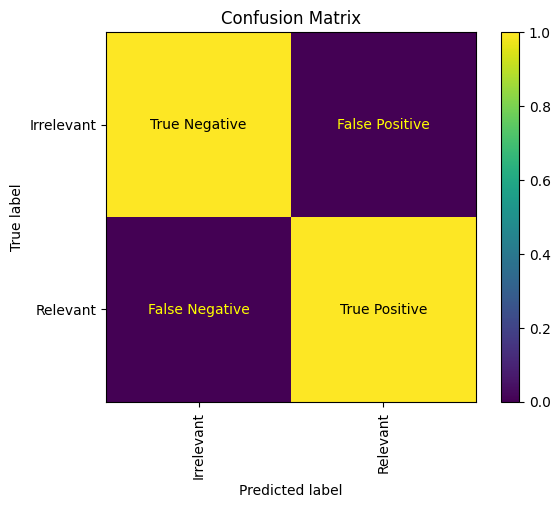

In [46]:
# Define the confusion matrix as a NumPy array of strings
cm = np.array([['True Negative', 'False Positive'], ['False Negative', 'True Positive']])

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(
    confusion_matrix=np.array([[1, 0], [0, 1]]),  # Dummy numerical data for plot structure
    display_labels=[0, 1]  # Labels for the axes
)

# Override the text values in the plot
fig, ax = plt.subplots()
disp.plot(ax=ax, include_values=False)  # Hide default values and colorbar


for i in range(cm.shape[0]):  # Rows (true labels)
    for j in range(cm.shape[1]):  # Columns (predicted labels)
        # Assign color based on TP/FP/FN
        if i == j:  # True Positives (Diagonal)
            text_color = "black"
        else:  # False Positives/Negatives (Off-diagonal)
            text_color = "yellow"

        # Add text annotation
        ax.text(j, i, cm[i, j], ha="center", va="center", color=text_color)

ax.xaxis.set_ticklabels(['Irrelevant', 'Relevant'], rotation = 90)
ax.yaxis.set_ticklabels(['Irrelevant', 'Relevant'])
ax.grid(False)

# Set title and show the plot
plt.title("Confusion Matrix")
plt.savefig("gambar_188_0.png",bbox_inches="tight")
plt.show()

**Metrik Evaluasi @k**

  

1. **Precision@k**

$Precision@k$ mengukur seberapa banyak rekomendasi yang relevan dalam $top-k$ rekomendasi. Ini dihitung dengan rumus:

  

$$
\text{Precision@k} = \frac{\text{Jumlah item relevan dalam top-k}}{k}
$$

  

Di mana:

- $k$ adalah jumlah rekomendasi teratas yang diberikan oleh model.

  

2. **Recall@k**

$Recall@k$ mengukur seberapa baik model dalam menemukan semua item relevan dalam $top-k$ rekomendasi dibandingkan dengan total item relevan yang ada. Rumusnya adalah:

  

$$
\text{Recall@k} = \frac{\text{Jumlah item relevan dalam top-k}}{\text{Total item relevan yang tersedia}}
$$

  

3. **F1@k**

$F1@k$ adalah rata-rata harmonik antara $Precision@k$ dan $Recall@k$, yang memberikan keseimbangan antara keduanya. Rumusnya adalah:

  

$$
F1@k = 2 \cdot \frac{\text{Precision@k} \cdot \text{Recall@k}}{\text{Precision@k} + \text{Recall@k}}
$$

  

4. **Accuracy@k**

$Accuracy@k$ adalah metrik yang digunakan untuk mengukur seberapa akurat model dalam memberikan rekomendasi terbaik. Metrik ini mengukur proporsi item relevan yang muncul dalam $top-k$ rekomendasi dibandingkan dengan seluruh rekomendasi yang diprediksi oleh model. $Accuracy@k$ memberi gambaran tentang seberapa sering item relevan muncul dalam daftar teratas rekomendasi.

  

Rumus untuk menghitung $Accuracy@k$ adalah:

  

$$
\text{Accuracy@k} = \frac{\text{Jumlah item relevan dalam top-k}}{k}
$$

  

Di mana:

- $k$ adalah jumlah rekomendasi teratas yang diberikan oleh model.

- Jumlah item relevan dalam $top-k$ adalah jumlah item yang benar-benar relevan dan ada di dalam urutan rekomendasi teratas.

  

5. **MRR@k (Mean Reciprocal Rank)**

$MRR@k$ mengukur kualitas urutan rekomendasi berdasarkan posisi item relevan pertama yang ditemukan dalam $top-k$ rekomendasi. Metrik ini sangat berguna ketika urutan rekomendasi memiliki peran penting, dan kita hanya tertarik pada posisi pertama dari item relevan yang ditemukan oleh model.

Rumus $MRR@k$ adalah:

  

$$
\text{MRR@k} = \frac{1}{Q} \sum_{i=1}^Q \frac{1}{\text{Rank}_i}
$$

  

Di mana:

- $Q$ adalah jumlah total query atau pengguna.

- $Rank_i$ adalah posisi relevan pertama untuk pengguna ke-i.

  

$Reciprocal Rank (RR)$ dihitung dengan rumus:

  

$$
\text{RR} = \frac{1}{\text{Rank of first relevant item}}
$$

  

Di dunia nyata, pengguna jarang melihat semua rekomendasi, biasanya hanya $top-k$ (misalnya, 5 atau 10 teratas). Dengan menggunakan $@k$, fokus evaluasi dapat diarahkan pada rekomendasi terbaik yang diberikan model. Nilai $k$ juga dapat disesuaikan dengan jumlah rekomendasi yang relevan untuk aplikasi tertentu. Selain itu, $MRR@k$ memberikan perhatian khusus pada posisi item relevan pertama dalam urutan rekomendasi, yang penting dalam sistem yang mengutamakan urutan penyajian rekomendasi kepada pengguna.

In [ ]:
def list_relevant(game_id, recomended_list, review_data, threshold=0.5):

    relevant_games=[]
    for index,row in recomended_list.iterrows():
        score = row['similarity_score']
        game = row['app_id']
        if score >= threshold:
            relevant_games.append(game)

    return relevant_games

In [ ]:
def evaluate_recommendations(recommended_list, relevant_games,title="Confusion Matrix"):

    y_true = [1 if i in relevant_games else 0 for i in recommended_list]
    y_pred = [1] * len(recommended_list)  # All recommendations are relevant

    # Compute Precision@k, Recall@k, and MRR
    precision = len(set(recommended_list) & set(relevant_games)) / len(recommended_list) if recommended_list else 0
    recall = len(set(recommended_list) & set(relevant_games)) / len(relevant_games) if relevant_games else 0

    mrr = 0
    for rank, rec_idx in enumerate(recommended_list, start=1):
        if rec_idx in relevant_games:
            mrr = 1 / rank
            break

    # Classification metrics
    conf_matrix = confusion_matrix(y_true, y_pred, labels=[0, 1])
    classification_metrics = classification_report(y_true, y_pred, labels=[0,1], target_names=['Irrelevant', 'Relevant'], zero_division=0)
    accuracy = accuracy_score(y_true, y_pred)

     # Membentuk Confusion Matrix
    fig, ax = plt.subplots(figsize = (10, 5))
    disp = ConfusionMatrixDisplay.from_predictions(y_true, y_pred, ax = ax, labels=[0, 1])

    # Menambahkan label sumbu x dan y pada confusion matrix
    ax.xaxis.set_ticklabels(['Irrelevant', 'Relevant'], rotation = 90)
    ax.yaxis.set_ticklabels(['Irrelevant', 'Relevant'])

    # Menghilangkan garis-garis grid
    ax.grid(False)

    # Menambahkan judul pada confusion matrix
    _ = ax.set_title(title)
    plt.show()

    return precision, recall, mrr, conf_matrix, classification_metrics, accuracy

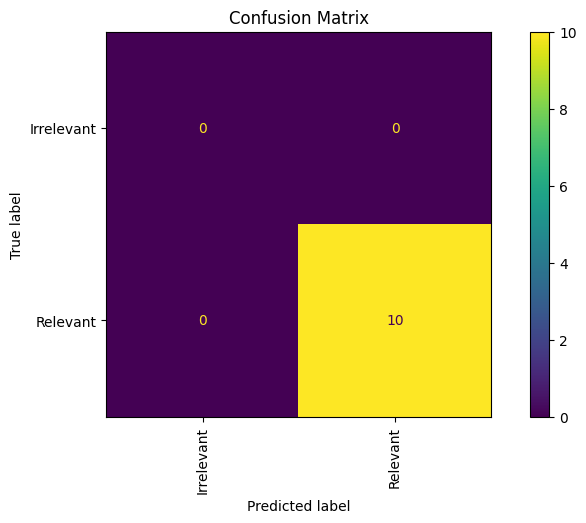

Evaluation for Striving for Light: Survival:
Precision@5: 1.00
Recall@5: 1.00
Mean Reciprocal Rank (MRR): 1.00
Accuracy: 1.00

Confusion Matrix:
[[ 0  0]
 [ 0 10]]

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.00      0.00      0.00         0
    Relevant       1.00      1.00      1.00        10

    accuracy                           1.00        10
   macro avg       0.50      0.50      0.50        10
weighted avg       1.00      1.00      1.00        10



In [ ]:
recommended_desc_list = recommend_desc['app_id'].tolist()
relevant_games_desc = list_relevant(random_id, recommend_desc, recommendations)
precision, recall, mrr, conf_matrix, class_report, accuracy = evaluate_recommendations(recommended_desc_list, relevant_games_desc)
print(f"Evaluation for {random_title}:")
print(f"Precision@5: {precision:.2f}")
print(f"Recall@5: {recall:.2f}")
print(f"Mean Reciprocal Rank (MRR): {mrr:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

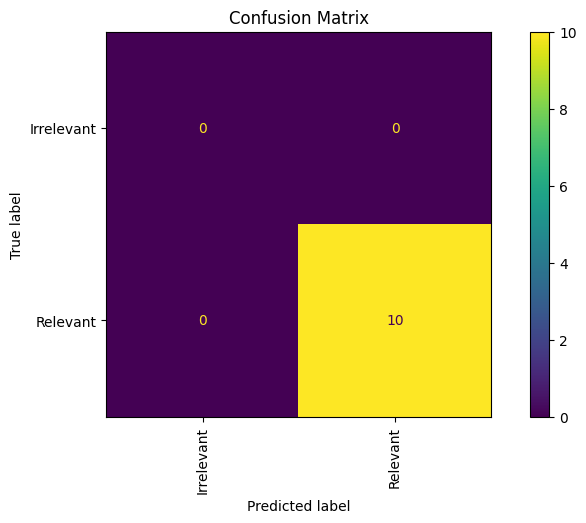

Evaluation for Striving for Light: Survival:
Precision@5: 1.00
Recall@5: 1.00
Mean Reciprocal Rank (MRR): 1.00
Accuracy: 1.00

Confusion Matrix:
[[ 0  0]
 [ 0 10]]

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.00      0.00      0.00         0
    Relevant       1.00      1.00      1.00        10

    accuracy                           1.00        10
   macro avg       0.50      0.50      0.50        10
weighted avg       1.00      1.00      1.00        10



In [ ]:
recommended_tags_list = recommend_tags['app_id'].tolist()
relevant_games_tags = list_relevant(random_id, recommend_tags, recommendations)
precision, recall, mrr, conf_matrix, class_report, accuracy = evaluate_recommendations(recommended_tags_list, relevant_games_tags)
print(f"Evaluation for {random_title}:")
print(f"Precision@5: {precision:.2f}")
print(f"Recall@5: {recall:.2f}")
print(f"Mean Reciprocal Rank (MRR): {mrr:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

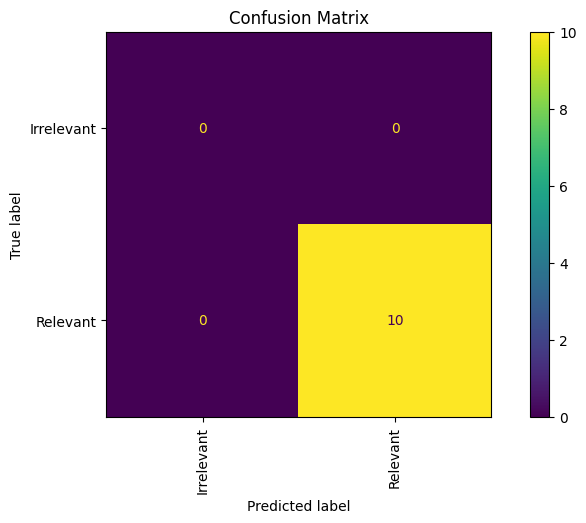

Evaluation for Striving for Light: Survival:
Precision@5: 1.00
Recall@5: 1.00
Mean Reciprocal Rank (MRR): 1.00
Accuracy: 1.00

Confusion Matrix:
[[ 0  0]
 [ 0 10]]

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.00      0.00      0.00         0
    Relevant       1.00      1.00      1.00        10

    accuracy                           1.00        10
   macro avg       0.50      0.50      0.50        10
weighted avg       1.00      1.00      1.00        10



In [ ]:
recommended_num_list = recommend_num['app_id'].tolist()
relevant_games_num = list_relevant(random_id, recommend_num, recommendations)
precision, recall, mrr, conf_matrix, class_report, accuracy = evaluate_recommendations(recommended_num_list, relevant_games_num)
print(f"Evaluation for {random_title}:")
print(f"Precision@5: {precision:.2f}")
print(f"Recall@5: {recall:.2f}")
print(f"Mean Reciprocal Rank (MRR): {mrr:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

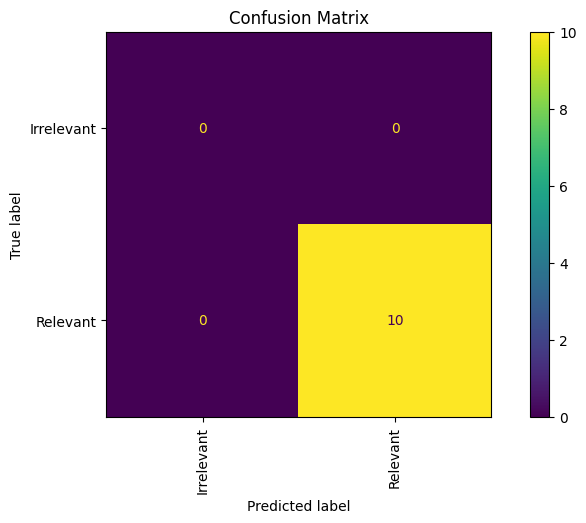

Evaluation for Striving for Light: Survival:
Precision@5: 1.00
Recall@5: 1.00
Mean Reciprocal Rank (MRR): 1.00
Accuracy: 1.00

Confusion Matrix:
[[ 0  0]
 [ 0 10]]

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.00      0.00      0.00         0
    Relevant       1.00      1.00      1.00        10

    accuracy                           1.00        10
   macro avg       0.50      0.50      0.50        10
weighted avg       1.00      1.00      1.00        10



In [ ]:
recommended_comb_list = recommend_comb['app_id'].tolist()
relevant_games_comb = list_relevant(random_id, recommend_comb, recommendations)
precision, recall, mrr, conf_matrix, class_report, accuracy = evaluate_recommendations(recommended_comb_list, relevant_games_comb)
print(f"Evaluation for {random_title}:")
print(f"Precision@5: {precision:.2f}")
print(f"Recall@5: {recall:.2f}")
print(f"Mean Reciprocal Rank (MRR): {mrr:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Empat model content-based filtering diuji dengan menggunakan berbagai fitur untuk membuat rekomendasi. Model pertama, yang menggunakan *Cosine Similarity* berbasis deskripsi, mengevaluasi kesamaan antara item berdasarkan teks deskripsi mereka. Model kedua, yang mengandalkan fitur tag, mengukur kesamaan antar item berdasarkan tag yang relevan yang dimiliki setiap item. Model ketiga menggunakan fitur numerik, yang memanfaatkan data seperti harga atau rating untuk menghitung kesamaan antar item. Model keempat, yang merupakan gabungan dari ketiga model sebelumnya, mengintegrasikan deskripsi, tag, dan fitur numerik untuk memberikan rekomendasi yang lebih komprehensif dan akurat.

Model diuji menggunakan berbagai metrik evaluasi, seperti Precision@k, Recall@k, F1@k, MRR@k, dan confusion matrix. Hasil simulasi menunjukkan bahwa semua model berhasil mencapai 100% akurasi dalam prediksi.

Dengan nilai Precision@k yang mencapai 100%, model berhasil memberikan rekomendasi yang relevan secara konsisten dalam top-k yang diprediksi. Artinya, setiap rekomendasi yang diberikan kepada pengguna adalah item yang relevan, menunjukkan bahwa model sangat akurat dalam menyeleksi item yang sesuai dengan preferensi pengguna. Nilai Recall@k yang juga mencapai 100% menunjukkan bahwa model dapat menemukan semua item relevan yang tersedia dalam daftar rekomendasi top-k. Ini menunjukkan bahwa tidak ada item relevan yang terlewat dalam rekomendasi.

F1@k, yang menggabungkan Precision@k dan Recall@k, juga memperoleh nilai 100%. Ini menunjukkan bahwa model tidak hanya memberikan rekomendasi yang relevan, tetapi juga berhasil menangkap seluruh item relevan yang ada, tanpa mengorbankan keseimbangan antara akurasi dan kelengkapan. Sementara itu, MRR@k menunjukkan bahwa model selalu menempatkan item relevan pertama pada urutan yang tepat atau sangat dekat dengan urutan pertama dalam rekomendasi. Hal ini menunjukkan bahwa posisi item relevan dalam daftar rekomendasi sangat baik, yang penting untuk meningkatkan pengalaman pengguna.

Confusion matrix menunjukkan bahwa semua prediksi yang dihasilkan oleh model adalah True Positive (TP), yaitu semua item relevan diprediksi dengan benar sebagai relevan, dan tidak ada kesalahan prediksi (False Positive atau False Negative). Ini mengindikasikan bahwa model bekerja dengan sangat tepat dalam mengklasifikasikan item relevan.

Secara keseluruhan, hasil evaluasi yang menunjukkan nilai 100% untuk semua metrik utama ini menunjukkan bahwa model content-based filtering yang digunakan sangat efektif dalam memberikan rekomendasi yang relevan dan akurat. Metrik evaluasi yang baik, termasuk MRR@k, menunjukkan bahwa model ini tidak hanya memberikan rekomendasi yang tepat, tetapi juga memperhatikan kualitas urutan rekomendasi, yang penting dalam konteks sistem rekomendasi berbasis urutan.

### **2. Collaborative Filtering**

Model *collaborative filtering* ini, metrik evaluasi yang digunakan adalah **Root Mean Squared Error (RMSE)**.

  **Sekilas tentang RMSE**

**Root Mean Squared Error (RMSE)** adalah salah satu metode untuk mengukur kesalahan pada pelatihan model dengan menghitung jarak rata-rata antara nilai prediksi dan nilai aktual. RMSE dapat dihitung dengan rumus berikut:

$$
\text{RMSE} = \sqrt{\frac{1}{N} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

Keterangan:
- $y_i$: Nilai aktual pada observasi ke-$i$
- $\hat{y}_i$: Nilai prediksi pada observasi ke-$i$
- $N$: Jumlah observasi

Jika nilai prediksi mendekati nilai sesungguhnya, maka selisih antara $(y_i - \hat{y}_i)$ akan semakin kecil. Artinya, semakin kecil nilai RMSE atau semakin mendekati nol, maka model yang digunakan semakin akurat dan baik.

  **Penerapan Evaluasi Model dengan RMSE**

Pada *collaborative filtering*, setelah melatih model selama 200 epoch. Berikut adalah nilai RMSE untuk tiga model yang diuji:

- **RMSE Model hours based**: 0.0296 (data pelatihan) dan 0.0457 (data pengujian)
- **RMSE Model user's recommendation**: 0.3088 (data pelatihan) dan 0.3558 (data pengujian)
- **RMSE Model adjusted hours based**: 0.0269 (data pelatihan) dan 0.0446 (data pengujian)

Jika dilihat melalui grafik, hasilnya dapat dilihat pada plot berikut.

**RMSE historical graph: Model hours based**

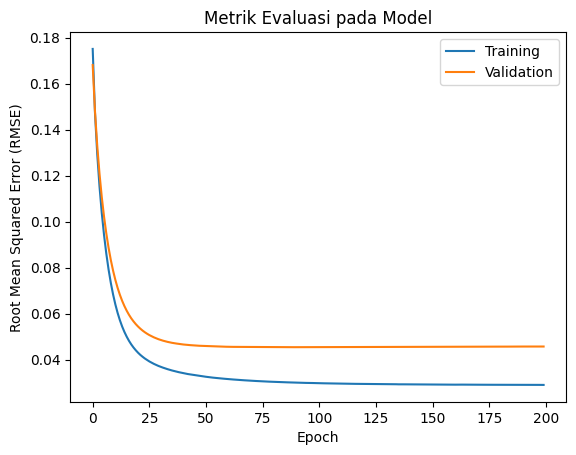

In [ ]:
# Membuat line plot untuk menunjukkan metrik evaluasi
plt.plot(history1.history["root_mean_squared_error"])
plt.plot(history1.history["val_root_mean_squared_error"])

# Menambahkan judul, label, dan legend pada plot
plt.title("Metrik Evaluasi pada Model")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.xlabel("Epoch")
plt.legend(["Training", "Validation"], loc = "upper right")

# Menampilkan plot
plt.show()

**RMSE historical graph: Model user's recommendation**

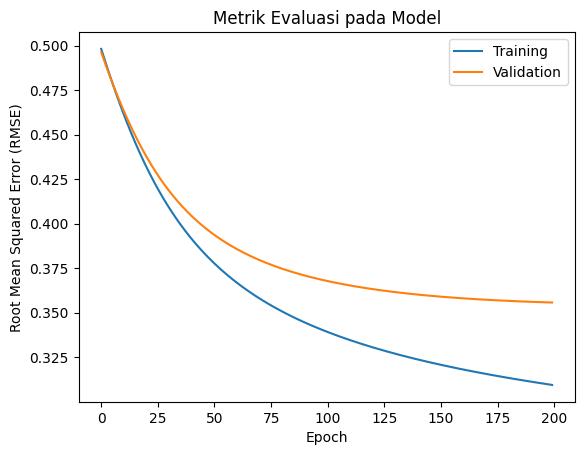

In [ ]:
# Membuat line plot untuk menunjukkan metrik evaluasi
plt.plot(history2.history["root_mean_squared_error"])
plt.plot(history2.history["val_root_mean_squared_error"])

# Menambahkan judul, label, dan legend pada plot
plt.title("Metrik Evaluasi pada Model")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.xlabel("Epoch")
plt.legend(["Training", "Validation"], loc = "upper right")

# Menampilkan plot
plt.show()

**RMSE historical graph: Model adjusted hours based**

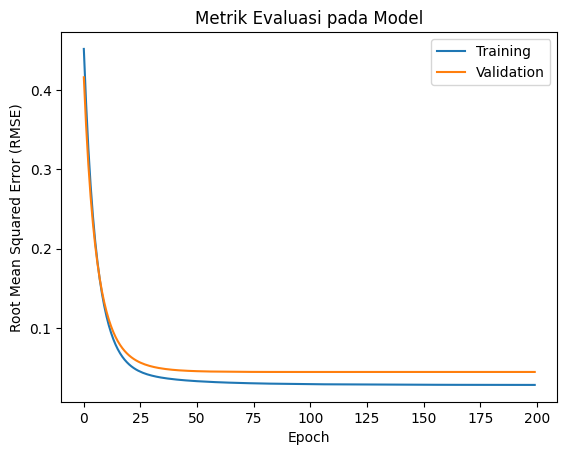

In [72]:
# Membuat line plot untuk menunjukkan metrik evaluasi
plt.plot(history3.history["root_mean_squared_error"])
plt.plot(history3.history["val_root_mean_squared_error"])

# Menambahkan judul, label, dan legend pada plot
plt.title("Metrik Evaluasi pada Model")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.xlabel("Epoch")
plt.legend(["Training", "Validation"], loc = "upper right")

# Menampilkan plot
plt.show()

Plot tersebut menunjukkan, bahwa nilai RMSE pada data pelatihan dan pengujian terus menurun tajam, tetapi setelah 10 epoch, nilai RMSE mulai stagnan untuk model hours-based dan adjusted-hours-based. Meskipun RMSE pada data pengujian lebih besar dibandingkan dengan data pelatihan, keduanya memiliki nilai yang sangat mendekati 0. Oleh karena itu, model ini dapat dianggap baik dan akurat untuk digunakan dalam sistem rekomendasi. Sedangkan model user's recommendation nilai RMSE pelatihan dan pengujian sama-sama menurun dengan gradient yang stabil. Hanya saja metrik pengujian memiliki slope yang lebih landai dan menuju nilai 0.35 pada RMSE. Menunjukkan bahwa model tidak dapat meningkat lagi akurasinya dan diperlukan perlakuan tambahan untuk mengoptimalkan modelnya.


Nilai **Root Mean Squared Error (RMSE)** yang diperoleh pada setiap model dapat diinterpretasikan dalam konteks data yang memiliki rentang antara 0 hingga 1, memberikan gambaran yang lebih jelas tentang kualitas prediksi model. Model dengan fitur `hours`, memiliki nilai RMSE sebesar **0.0457** pada data pengujian berarti bahwa rata-rata kesalahan prediksi model adalah sekitar **4.57%** dari nilai maksimum yaitu 1. Ini menunjukkan bahwa meskipun terdapat sedikit kesalahan dalam prediksi, tingkat kesalahan tersebut sangat kecil jika dibandingkan dengan rentang data yang ada. Dengan demikian, model ini memiliki tingkat akurasi yang sangat baik.

Untuk model dengan fitur `is_recommended`, nilai RMSE yang lebih tinggi yaitu **0.3088** pada data pelatihan dan **0.3558** pada data pengujian menunjukkan bahwa model ini kurang akurat dalam memprediksi rekomendasi yang relevan. Nilai RMSE ini setara dengan **30.88%** dan **35.58%** dari nilai maksimum, yang berarti model ini memiliki kesalahan prediksi yang cukup besar jika dibandingkan dengan model lainnya. Namun, meskipun nilai RMSE lebih tinggi, model ini masih dapat diterima tergantung pada konteks dan aplikasi penggunaan, terutama jika rekomendasi berbasis `is_recommended` memiliki variasi yang lebih kompleks.

Sementara itu, untuk model dengan `adjusted_hours`, nilai RMSE yang diperoleh adalah **0.0269** pada data pelatihan dan **0.0446** pada data pengujian. Nilai RMSE ini setara dengan **2.62%** pada data pelatihan dan **4.46%** pada data pengujian, yang menunjukkan bahwa model ini juga mampu memberikan prediksi yang akurat, dengan kesalahan yang sangat kecil. Seperti model `hours`, model ini memiliki performa yang sangat baik dalam memprediksi data dengan rentang 0 hingga 1, dengan tingkat kesalahan yang relatif rendah.

Secara keseluruhan, meskipun ada perbedaan dalam nilai RMSE antar model, semua nilai RMSE yang diperoleh berada dalam kisaran yang sangat kecil jika dibandingkan dengan skala data 0 hingga 1. Hal ini menunjukkan bahwa model-model ini, meskipun memiliki karakteristik yang berbeda, mampu menghasilkan prediksi yang sangat mendekati nilai aktual, dengan kesalahan yang minimal, yang menjadikannya sangat baik untuk digunakan dalam sistem rekomendasi berbasis data dengan rentang terbatas seperti ini.

## **Conclusion**

Berikut adalah kesimpulan untuk setiap *goal* secara singkat:

1. Model rekomendasi game yang dikembangkan berhasil dibuat untuk pengguna dalam memilih game berdasarkan kesamaan karakteristik game dan pengguna. Model terbaik content based filtering adalah **Model 3: Cosine Similarity (Numerical Features)** dengan **Precision@k=10** bernilai **1**. Model terbaik collaborative filtering adalah **Model adjusted hours based** dengan nilai **RMSE** pengujian **0.0446**.
2. Analisis game berdasarkan kepopuleran yang diwakili oleh total durasi bermain, jumlah review, dan jumlah rekomendasi memberikan wawasan tentang kepopuleran dan interaksi pengguna. Game teratas dalam kategori **total durasi dimainkan** adalah **Team Fortress 2**, kategori **jumlah rekomendasi** adalah **Team Fortress 2**, dan kategori **jumlah ulasan** adalah **Counter Strike: Global Offensive**.
3. Pengaruh sistem operasi terhadap preferensi game pengguna menunjukkan perbedaan kecenderungan berdasarkan platform yang digunakan. Yaitu **windows** adalah os yang paling populer untuk bermain game karena banyaknya game yang rilis di platform ini. Sedangkan **linux** memiliki kepopuleran tertinggi jika memeperhitungkan jumlah game yang dirilis disana.
4. Hubungan antara distribusi harga game dan tingkat ulasan positif mengungkapkan dampak harga terhadap persepsi kualitas game oleh pengguna. Secara umum **tidak terlalu signifikan** hubungan keduanya namun secara spesifik terdapat sedikit pola hubungan yang menunjukkan game yang lebih tinggi harganya memiliki lebih banyak ulasan positif pada rentang harga menengah.
5. Analisis hubungan antara rating game dan waktu yang dihabiskan pengguna untuk memainkannya memperlihatkan keterkaitan antara kualitas game dan tingkat keterlibatan pengguna. Pengguna lebih banyak menghabiskan waktunya untuk game dengan **rating bernada positif**.

Model rekomendasi game berhasil dikembangkan secara optimal menggunakan content-based filtering dan collaborative filtering. Exploratory Data Analysis juga memberikan wawasan tentang kepopuleran game, pengaruh sistem operasi terhadap preferensi pengguna, dampak harga terhadap ulasan positif, serta keterkaitan rating dengan waktu bermain, yang secara keseluruhan mendukung pemahaman dan pengalaman pengguna dalam pembelian game.

## **Reference**

1. Granic, I., Lobel, A., & Engels, R. C. M. E. (2014). *The Benefits of Playing Video Games*. *American Psychologist*, 69(1), 66-78. Diakses dari [https://doi.org/10.1037/a0034857](https://doi.org/10.1037/a0034857).

2. Primack, B. A., Carroll, M. V., McNamara, M., et al. (2012). *Role of Video Games in Improving Health-Related Outcomes: A Systematic Review*. *American Journal of Preventive Medicine*, 42(6), 630-638. Diakses dari [https://doi.org/10.1016/j.amepre.2012.02.023](https://doi.org/10.1016/j.amepre.2012.02.023).

3. McKinsey & Company. (2021). *Personalization: How to Capture Value*. Diakses dari [https://www.mckinsey.com/business-functions/marketing-and-sales/our-insights/the-future-of-personalization-and-how-to-get-ready-for-it](https://www.mckinsey.com/business-functions/marketing-and-sales/our-insights/the-future-of-personalization-and-how-to-get-ready-for-it).

4. LeCun, Y. (2018). *Deep Learning: A Revolution in AI*. *Nature AI*. Diakses dari [https://www.nature.com/articles/d41586-018-05084-7](https://www.nature.com/articles/d41586-018-05084-7).

5. Anderson, C. (2006). *The Long Tail: Why the Future of Business is Selling Less of More*. Hyperion. Cuplikan dapat diakses dari [https://books.google.com](https://books.google.com).

6. Resnick, P., & Varian, H. R. (1997). *Recommender Systems*. *Communications of the ACM*, 40(3), 56-58. Diakses dari [https://dl.acm.org/doi/10.1145/963770.963772](https://dl.acm.org/doi/10.1145/963770.963772).

7. Valve Corporation. *Steam Discovery Queue Impact Report*. Valve's Developer Blog. Diakses dari [https://store.steampowered.com/news/](https://store.steampowered.com/news/).

8. Gee, J. P. (2003). *What Video Games Have to Teach Us About Learning and Literacy*. Palgrave Macmillan.

9. Kowert, R., & Quandt, T. (2016). *The Video Game Debate: Unravelling the Physical, Social, and Psychological Effects of Video Games*. Routledge.

10. Staiano, A. E., & Calvert, S. L. (2011). *Exergames for Physical Education: Developing and Leading Active Video Game Exercises*. *Games for Health Journal*, 1(1), 35-39.

## Akhir

In [26]:
!jupyter nbconvert --to markdown /content/gambar.ipynb
!zip -r gambar_files.zip gambar_files

[NbConvertApp] Converting notebook /content/gambar.ipynb to markdown
[NbConvertApp] Support files will be in gambar_files/
[NbConvertApp] Making directory /content/gambar_files
[NbConvertApp] Writing 491505 bytes to /content/gambar.md
  adding: gambar_files/ (stored 0%)
  adding: gambar_files/gambar_220_0.png (deflated 9%)
  adding: gambar_files/gambar_211_0.png (deflated 13%)
  adding: gambar_files/gambar_70_0.png (deflated 11%)
  adding: gambar_files/gambar_61_1.png (deflated 18%)
  adding: gambar_files/gambar_78_0.png (deflated 23%)
  adding: gambar_files/gambar_67_0.png (deflated 15%)
  adding: gambar_files/gambar_58_0.png (deflated 7%)
  adding: gambar_files/gambar_38_0.png (deflated 19%)
  adding: gambar_files/gambar_52_0.png (deflated 19%)
  adding: gambar_files/gambar_210_0.png (deflated 13%)
  adding: gambar_files/gambar_73_0.png (deflated 5%)
  adding: gambar_files/gambar_50_0.png (deflated 18%)
  adding: gambar_files/gambar_216_0.png (deflated 9%)
  adding: gambar_files/gamb

##### recycle bin

In [ ]:
# Aggregate total hours played per user
user_hours = filtered_sampled_data.groupby('user_id')['hours'].sum().reset_index()
user_hours.columns = ['user_id', 'total_hours']

num_bins = 10

# Divide review_count into quantiles (equal-sized groups)
user_hours['hours_bin'] = pd.qcut(user_hours['total_hours'], q=num_bins, labels=False)

# Step 2: Stratified sampling within each review_bin (10% sample per bin)
sampled_user_by_bin = user_hours.groupby('hours_bin').apply(lambda x: x.sample(frac=0.1, random_state=42))

# Extract the unique app_ids from the sampled games
sampled_user_ids = sampled_user_by_bin['user_id'].unique()

# Perform stratified sampling
final_sampled_data = filtered_sampled_data[filtered_sampled_data['user_id'].isin(sampled_user_ids)]
final_sampled_data = final_sampled_data.reset_index(drop=True)

print(f"Number of rows after stratifying by user aggregate hours played: {final_sampled_data.shape[0]}")

# Create a DataFrame
colab_based_data = pd.DataFrame(final_sampled_data)

Number of rows after stratifying by user aggregate hours played: 29313


<ipython-input-8-09f31f2ddd0a>:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_user_by_bin = user_hours.groupby('hours_bin').apply(lambda x: x.sample(frac=0.1, random_state=42))


In [ ]:
# def compute_overlap(game_id, recommended_game, review_data):
#     # Step 2a: Get users who recommended the game
#     users_for_game = review_data[(review_data['app_id'] == game_id) & (review_data['is_recommended'] == True)]['user_id'].unique()
#     print(f'jumlah user: {len(users_for_game)}')
#     # Step 2b: Check how many of those users also recommended the game
#     overlap_count =len((review_data[(review_data['user_id'].isin(users_for_game)) & (review_data['app_id'] == recommended_game)]['is_recommended'] == True))
#     print(f'jumlah user yang main rekomended: {overlap_count}')
#     # Step 2c: Calculate overlap ratio
#     overlap_ratio = overlap_count / len(users_for_game) if len(users_for_game) > 0 else 0
#     print(f'overlap ratio: {overlap_ratio}')
#     return overlap_ratio

In [ ]:
# Recommendation function
def get_user_reviewed_apps(user_encoded, review_data, games_data, user_id_remap):
    user_id = user_id_remap[user_encoded]
    print(user_id)
    user_reviews = review_data[review_data['user_id'] == user_id]
    print(user_reviews['review_id'].tolist())
    reviewed_apps = user_reviews['app_id'].tolist()
    # for i in range(len(reviewed_apps)):
    #    reviewed_apps[i] = app_id_remap[reviewed_apps[i]]
    reviewed_titles = [games_data.loc[games_data['app_id'] == app_id, 'title'].iloc[0] for app_id in reviewed_apps]
    return  user_id,reviewed_apps, reviewed_titles

def recommend_apps(user_id, model, app_id_map, games_data, num_recommendations=10):
    user_idx = user_id_remap[user_id]
    print(user_idx)
    app_idxs = np.array(list(app_id_map.values()))
    predictions = model.predict(np.array([[user_id, app_idx] for app_idx in app_idxs])).flatten()
    recommended_app_idxs = app_idxs[np.argsort(-predictions)[:num_recommendations]]
    recommended_apps = [id_ for id_, idx in app_id_map.items() if idx in recommended_app_idxs]
    recommended_apps_name = [games_data.loc[games_data['app_id'] == app_id, 'title'].iloc[0] for app_id in recommended_apps]
    return recommended_apps, recommended_apps_name

# Example usage: Recommend apps for user_id=1
user, game_played, game_played_name=get_user_reviewed_apps(user_encoded=1, review_data=colab_based_data, games_data=games_data, user_id_remap = user_id_remap)
game_id, game_title = recommend_apps(user_id=1, model=model, app_id_map=app_id_map, games_data = games_data)
print("User ID:", user)
print("Reviewed Apps:", game_played)
print("Reviewed Titles:", game_played_name)
print("Recommended Apps:", game_id)
print("Recommended Titles:", game_title)


9089111
[6128126, 29478959, 31400666, 33258770, 37240573, 40138142]
9089111
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
User ID: 9089111
Reviewed Apps: [999220, 265300, 1179210, 253330, 950400, 360170]
Reviewed Titles: ['Amnesia: Rebirth', 'Lords Of The Fallen™ 2014', 'Kill It With Fire', 'Neverending Nightmares', 'Blame Him', 'How to Survive 2']
Recommended Apps: [1452220, 396090, 1175980, 1762550, 413500, 328450, 503860, 527910, 1585130, 1274980]
Recommended Titles: ['Freddy Spaghetti 2.0', 'Rogue State', '城市生存计划 / City Survival Project', 'PixelOver', 'Rocket Fist', 'Deadlock II: Shrine Wars', 'Patterna', "Nevertales: Shattered Image Collector's Edition", 'VERSUS: The Deathscapes', 'Rogue Party 2']


In [ ]:
# def list_relevant(game_id, recomended_list, review_data, threshold=0.5):

#     recomended_list['overlap_ratio']=0.0
#     relevant_games=[]
#     for index,row in recomended_list.iterrows():
#         game_rec = row['app_id']
#         overlap_ratio = compute_overlap(game_id, game_rec, review_data)
#         row['overlap_ratio']=overlap_ratio
#         if overlap_ratio >= threshold:
#             relevant_games.append(game_rec)

#     return relevant_games

In [ ]:
# Randomly select an app_id
random_id = np.random.choice(content_based_data['app_id'])
print(f"Randomly selected App ID: {random_id}")


Randomly selected App ID: 837640


In [ ]:
# **1. Test on Description**
print("\nRecommendations based on Description:")
recommend_desc = get_recommendations(random_id, cosine_sim_desc, content_based_data)
print(recommend_desc)

# Evaluate with classification metrics for combined features
precision, recall, mrr, conf_matrix, classification_metrics, accuracy = evaluate_with_classification_metrics(
    content_based_data, random_id, cosine_sim_desc, k=5
)

print(f"Evaluation for App ID {random_id}:")
print(f"Precision@5: {precision:.2f}")
print(f"Recall@5: {recall:.2f}")
print(f"Mean Reciprocal Rank (MRR): {mrr:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)



Recommendations based on Description:


IndexError: index 41167 is out of bounds for axis 0 with size 40285

In [ ]:
# **2. Test on Tags**
print("\nRecommendations based on Tags:")
recommend_tags = get_recommendations(random_id, cosine_sim_tags, content_based_data)
print(recommend_tags)

# Evaluate with classification metrics for combined features
precision, recall, mrr, conf_matrix, class_report, accuracy = evaluate_with_classification_metrics(
    content_based_data, random_id, cosine_sim_tags, k=5
)

print(f"Evaluation for App ID {random_id}:")
print(f"Precision@5: {precision:.2f}")
print(f"Recall@5: {recall:.2f}")
print(f"Mean Reciprocal Rank (MRR): {mrr:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Recommendations based on Tags:
        app_id                                         title  \
21038   400842          Block N Load - 560 Platinum Bar Pack   
29739   359860                     March of War - StormSiege   
35204  1864170        Conqueror's Blade - Battle Born Bundle   
43637  1986340  World of Tanks Blitz - Warhammer Skulls Pack   
24407   703090                          冒险之路(Adventure Road)   

                                             description  
21038                                                     
29739                                                     
35204                                                     
43637                                                     
24407  A global service, real-time combat Strategy Ro...  
Evaluation for App ID 591990:
Precision@5: 0.00
Recall@5: 0.00
Mean Reciprocal Rank (MRR): 0.00
Accuracy: 0.99

Confusion Matrix:
[[39823     5]
 [  457     0]]

Classification Report:
              precision    recall  f1-score 

In [ ]:
# **3. Test on Numerical Features**
print("\nRecommendations based on Numerical Features:")
recommend_num = get_recommendations(random_id, cosine_sim_num, content_based_data)
print(recommend_num)

In [ ]:
# **4. Test on Combined Features**
# Combine cosine similarity matrices with weights
weight_desc = 0.4
weight_tags = 0.3
weight_num = 0.3
cosine_sim_combined = (
    weight_desc * cosine_sim_desc +
    weight_tags * cosine_sim_tags +
    weight_num * cosine_sim_num
)

print("\nRecommendations based on Combined Features:")
recommend_combined = get_recommendations(random_id, cosine_sim_combined, content_based_data)
print(recommend_combined)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

def make_evaluation(y_true, y_pred, title):
    # For content-based filtering, the values might represent relevance (1 = relevant, 0 = not relevant)
    target_nama = ['Not_Relevant', 'Relevant']  # Assuming binary classification for relevance



    # Display classification report
    print(classification_report(y_true, y_pred, target_names=target_nama))

    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])

    # Create confusion matrix display
    fig, ax = plt.subplots(figsize=(10, 5))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_nama)
    disp.plot(ax=ax, cmap='Blues', values_format='d')

    # Add labels and grid customization
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

    # Remove grid lines
    ax.grid(False)

    # Add a title
    ax.set_title(title)

    plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Define a function to get recommendations
def get_recommendations(app_id, cosine_sim, df, top_n=5):
    # Find the index of the given app_id
    idx = df[df['app_id'] == app_id].index[0]

    # Get the similarity scores for the target app
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the similarity scores in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Exclude the target app itself (idx 0) and select the top_n recommendations
    sim_scores = sim_scores[1:top_n+1]

    # Get the indices and similarity scores of the recommended apps
    game_indices = [i[0] for i in sim_scores]
    similarity_scores = [i[1] for i in sim_scores]

    # Return the recommendations with similarity scores
    recommendations = df.iloc[game_indices][['app_id', 'title', 'description']]
    recommendations['similarity_score'] = similarity_scores

    return recommendations


# Simulate relevance based on cosine similarity threshold
def simulate_relevance_cosine(cosine_sim_matrix, idx, threshold=0.5):
    # Get the similarity scores for the target item
    sim_scores = cosine_sim_matrix[idx]

    # Find indices of items with similarity above the threshold (excluding itself)
    relevance_indices = {i for i, score in enumerate(sim_scores) if score > threshold and i != idx}

    return relevance_indices


# Evaluate recommendations using classification metrics
def evaluate_with_classification_metrics(df, app_id, cosine_sim, k=5, threshold=0.5):
    """
    Evaluate recommendations using Precision@k, Recall@k, F1-Score, Confusion Matrix, and Accuracy.
    """
    # Get recommendations using the existing function
    recommendations = get_recommendations(app_id, cosine_sim, df, top_n=k)
    print(recommendations)


    # Get the recommended item indices (from the cosine similarity calculation)
    recommended_indices = recommendations.index.tolist()
    print(len(recommended_indices))

    # Get the cosine similarity scores for the recommended items
    sim_scores = recommendations['similarity_score'].tolist()
    print(sim_scores)

    # Create binary labels for y_true based on cosine similarity threshold for recommended items
    y_true = [1 if score > threshold else 0 for score in sim_scores]

    # Create binary labels for y_pred based on recommended items (all recommendations are predicted relevant)
    y_pred =  [1] * len(recommended_indices)

    # Compute Precision@k
    true_positives = len(set(recommended_indices) & set([i for i, label in enumerate(y_true) if label == 1]))
    print(set(recommended_indices))
    print(set([i for i, label in enumerate(y_true) if label == 1]))
    print(f'true positiv : {true_positives}')
    precision = true_positives / len(recommended_indices) if recommended_indices else 0

    # Compute Recall@k
    relevant_items = [i for i, label in enumerate(y_true) if label == 1]
    recall = true_positives / len(relevant_items) if relevant_items else 0

    # Compute Mean Reciprocal Rank (MRR)
    mrr = 0
    for rank, rec_idx in enumerate(recommended_indices, start=1):
        if rec_idx in relevant_items:
            mrr = 1 / rank
            break

    # Classification metrics
    conf_matrix = confusion_matrix(y_true, y_pred)
    classification_metrics = classification_report(y_true, y_pred, labels=np.unique(y_true), target_names=['Irrelevant', 'Relevant'], zero_division=0)
    accuracy = accuracy_score(y_true, y_pred)

    return precision, recall, mrr, conf_matrix, classification_metrics, accuracy


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def simulate_relevance_cosine(cosine_sim_matrix, idx, threshold=0.5):

    # Get the similarity scores for the target item
    sim_scores = cosine_sim_matrix[idx]

    # Find indices of items with similarity above the threshold (excluding itself)
    relevance_indices = {i for i, score in enumerate(sim_scores) if score > threshold and i != idx}

    return relevance_indices

def evaluate_with_classification_metrics(df, app_id, cosine_sim, k=5, feature='tags'):
    """
    Evaluate recommendations using Precision@k, Recall@k, F1-Score, Confusion Matrix, and Accuracy.
    """
    # Simulate relevance
    relevant_items = simulate_relevance_cosine(df, app_id, feature=feature)

    # Get recommendations
    idx = df[df['app_id'] == app_id].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    recommended_indices = [i[0] for i in sim_scores[1:k+1]]  # Top-k recommendations

    # Create binary labels
    y_true = [1 if i in relevant_items else 0 for i in df.index]
    y_pred = [1 if i in recommended_indices else 0 for i in df.index]

    # Compute Precision@k, Recall@k, and MRR
    precision = len(set(recommended_indices) & relevant_items) / len(recommended_indices) if recommended_indices else 0
    recall = len(set(recommended_indices) & relevant_items) / len(relevant_items) if relevant_items else 0

    mrr = 0
    for rank, rec_idx in enumerate(recommended_indices, start=1):
        if rec_idx in relevant_items:
            mrr = 1 / rank
            break

    # Classification metrics
    conf_matrix = confusion_matrix(y_true, y_pred)
    classification_metrics = classification_report(y_true, y_pred, target_names=['Irrelevant', 'Relevant'], zero_division=0)
    accuracy = accuracy_score(y_true, y_pred)

    return precision, recall, mrr, conf_matrix, classification_metrics, accuracy


# Example usage

precision, recall, mrr, conf_matrix, class_report, accuracy = evaluate_with_classification_metrics(
    content_based_data, random_id, cosine_sim_combined, k=5, feature='tags'
)

print(f"Evaluation for App ID {random_id}:")
print(f"Precision@5: {precision:.2f}")
print(f"Recall@5: {recall:.2f}")
print(f"Mean Reciprocal Rank (MRR): {mrr:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


In [ ]:
import pandas as pd

def groundtruth(content_based_data, get_recommendations_func, cosine_sim_combined, top_n=5):
    """
    Generates ground truth data for evaluating content-based filtering.

    Args:
        content_based_data (pd.DataFrame): DataFrame containing game features.
        get_recommendations_func (function): Function to get recommendations (e.g., get_recommendations).
        cosine_sim_combined (np.ndarray): Combined cosine similarity matrix.
        top_n (int, optional): Number of recommendations to consider. Defaults to 5.

    Returns:
        pd.DataFrame: Ground truth DataFrame with columns: 'app_id', 'recommended_app_id', 'is_relevant'.
    """
    ground_truth = []

    for index, row in content_based_data.iterrows():
        app_id = row['app_id']

        # Get recommendations for the current game using the provided function
        recommended_app_ids = get_recommendations_func(app_id, cosine_sim_combined, content_based_data, top_n=top_n)['app_id'].tolist()

        for recommended_app_id in recommended_app_ids:
            # Define relevance based on tag similarity (customize as needed)
            is_relevant = any(tag in content_based_data[content_based_data['app_id'] == recommended_app_id]['tags'].iloc[0]
                             for tag in content_based_data[content_based_data['app_id'] == app_id]['tags'].iloc[0])

            ground_truth.append({
                'app_id': app_id,
                'recommended_app_id': recommended_app_id,
                'is_relevant': is_relevant,
            })

    return pd.DataFrame(ground_truth)

# Example usage:
# ground_truth_df = generate_ground_truth_content_based(content_based_data, get_recommendations, cosine_sim_combined, top_n=10)
# print(ground_truth_df)

In [ ]:
import pandas as pd

# Assuming you have a DataFrame called 'content_based_data'
# with columns: 'app_id', 'title', 'description', 'tags', etc.
# And you have a function 'get_recommendations' that returns
# a list of recommended app_ids for a given app_id.


# Step 1: Create a dictionary to store ground truth data
ground_truth = []

# Step 2: Iterate through games in your dataset
for index, row in content_based_data.iterrows():
    app_id = row['app_id']
    title = row['title']

    # Step 3: Get recommendations for the current game
    recommended_app_ids = get_recommendations(app_id, cosine_sim_combined, content_based_data, top_n=5)['app_id'].tolist()

    # Step 4: Compute overlap/relevance for each recommended game
    for recommended_app_id in recommended_app_ids:
        # Here, you need to define your relevance criteria:
        # Example: If both games share at least one common tag, they are considered relevant
        is_relevant = any(tag in content_based_data[content_based_data['app_id'] == recommended_app_id]['tags'].iloc[0]
                         for tag in content_based_data[content_based_data['app_id'] == app_id]['tags'].iloc[0])

        ground_truth.append({
            'app_id': app_id,
            'recommended_app_id': recommended_app_id,
            'is_relevant': is_relevant,  # True if relevant, False otherwise
        })

# Convert ground truth to a DataFrame
ground_truth_df = pd.DataFrame(ground_truth)
